<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/nlp-with-transformers/blob/main/09_few-to-no-labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="ÏΩîÎû©ÏóêÏÑú Ïã§ÌñâÌïòÍ∏∞"/></a>
</td></tr></table>

# Chapter 9. Î†àÏù¥Î∏î Î∂ÄÏ°± Î¨∏Ï†ú Îã§Î£®Í∏∞

Î†àÏù¥Î∏îÎßÅÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÑÌòÄ ÏóÜÍ±∞ÎÇò Îß§Ïö∞ Ï†ÅÏùÄ Í≤ΩÏö∞ÏóêÎèÑ ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Î∞©Î≤ï

- Ï†úÎ°úÏÉ∑ ÌïôÏäµ(zero-shot learning)

- Ìì®ÏÉ∑ ÌïôÏäµ(few-shot learning)

In [1]:
# ÏΩîÎû©Ïù¥ÎÇò Ï∫êÍ∏ÄÏùÑ ÏÇ¨Ïö©ÌïúÎã§Î©¥ Ïù¥ ÏÖÄÏùò Ï£ºÏÑùÏùÑ Ï†úÍ±∞ÌïòÍ≥† Ïã§ÌñâÌïòÏÑ∏Ïöî.
!git clone https://github.com/rickiepark/nlp-with-transformers.git
%cd nlp-with-transformers
from install import *
install_requirements(chapter=9)

Cloning into 'nlp-with-transformers'...
remote: Enumerating objects: 653, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 653 (delta 47), reused 15 (delta 8), pack-reused 569
Receiving objects: 100% (653/653), 62.41 MiB | 32.16 MiB/s, done.
Resolving deltas: 100% (335/335), done.
/content/nlp-with-transformers
‚è≥ Installing base requirements ...
‚úÖ Base requirements installed!
Using transformers v4.35.2
Using datasets v2.16.1
Using accelerate v0.26.1
Using nlpaug v1.1.11
Using skmultilearn
Using sacremoses v0.1.1


Î†àÏù¥Î∏îÎßÅ Îç∞Ïù¥ÌÑ∞ ÎπÑÏú®Ïóê Îî∞Î•∏ ÌïôÏäµ Î∞©Î≤ï ÏÑ†ÌÉù Ï†ÑÎûµ

1. Î†àÏù¥Î∏îÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎÇòÏöî?

  - Î†àÏù¥Î∏îÎßÅÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°∞Í∏àÏù¥ÎùºÎèÑ ÏûàÎã§Î©¥, Í∞ÄÏû• Ï¢ãÏùÄ Î∞©Î≤ïÏùÑ Í≤∞Ï†ïÌïòÎäîÎç∞ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ®
  - Î†àÏù¥Î∏îÎßÅÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÑÌòÄ ÏóÜÎã§Î©¥ Ï¢ÖÏ¢Ö Í∞ïÎ†•Ìïú Í∏∞Ï§ÄÏ†êÏùÑ ÏÑ∏ÏõåÏ£ºÎäî Ï†úÎ°úÏÉ∑ ÌïôÏäµÏùÑ Ï∂îÏ≤ú

2. Î†àÏù¥Î∏îÎßÅÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏñºÎßàÎÇò ÏûàÎÇòÏöî?

  - Î†àÏù¥Î∏îÎßÅÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎã§Î©¥, Í∑∏ Îã§ÏùåÏóêÎäî Îç∞Ïù¥ÌÑ∞Ïùò ÏñëÏù¥ Ï§ëÏöî
  - Í∞ÄÏö©Ìïú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Í∞Ä ÎßéÎã§Î©¥ ÎØ∏ÏÑ∏ ÌäúÎãù Î∞©Ïãù Ï∂îÏ≤ú

3. Î†àÏù¥Î∏îÎßÅÎêòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎÇòÏöî?

  - Î∂ÑÎ•òÍ∏∞Î•º ÌõàÎ†®ÌïòÍ∏∞ Ï†ÑÏóê Î†àÏù¥Î∏îÎßÅÎêòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©Ìï¥ Ìï¥Îãπ ÎèÑÎ©îÏù∏ÏóêÏÑú Ïñ∏Ïñ¥ Î™®Îç∏ÏùÑ ÎØ∏ÏÑ∏ ÌäúÎãùÌïòÎäî Î∞©Î≤ï
  - ÎπÑÏßÄÎèÑ Îç∞Ïù¥ÌÑ∞ Ï¶ùÏãù(UDA: Unsupervised Data Augmentation)
  - Î∂àÌôïÏã§ÏÑ± Ïù∏ÏßÄ ÏûêÍ∏∞ ÌõàÎ†®(UST: Uncerntainty-aware self-training)
  Îì± Îã§ÏñëÌïú Î≥µÏû°Ìïú Î∞©Î≤ïÏùÑ ÌôúÏö© Í∞ÄÎä•

4. Î†àÏù¥Î∏îÎßÅÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÑÌòÄ ÏóÜÎã§Î©¥?

   - Îç∞Ïù¥ÌÑ∞Î•º Î†àÏù¥Î∏îÎßÅÌï¥ ÎäòÎ¶¥ Ïàò ÏóÜÏùå
   - Ïù¥ Í≤ΩÏö∞ Ìì®ÏÉ∑ ÌïôÏäµÏù¥ÎÇò ÏÇ¨Ï†Ñ ÌõàÎ†® Ïñ∏Ïñ¥ Î™®Îç∏Ïùò ÏûÑÎ≤†Îî©ÏùÑ ÏÇ¨Ïö©Ìï¥ ÏµúÍ∑ºÏ†ë Ïù¥ÏõÉ Í≤ÄÏÉâ(Nearest Neighbor Search)Î°ú Î£©ÏóÖ(lookup)ÏùÑ ÏàòÌñâÌï† Ïàò ÏûàÏùå

   

<img alt="decision-tree" caption="Several techniques that can be used to improve model performance in the absence of large amounts of labeled data" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter09_decision-tree.png?raw=1" id="decision-tree"/>

**[Í∑∏Î¶º9-1]** ÎßéÏùÄ ÏñëÏùò Î†àÏù¥Î∏îÎßÅÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏùÑ Îïå Î™®Îç∏ ÏÑ±Îä•ÏùÑ Ìñ•ÏÉÅÌïòÍ∏∞ ÏúÑÌï¥ ÏÇ¨Ïö©ÌïòÎäî Ïó¨Îü¨Í∞ÄÏßÄ Í∏∞Î≤ï


## 9.1 ÍπÉÌóàÎ∏å Ïù¥Ïäà ÌÉúÍ±∞ ÎßåÎì§Í∏∞

ÌóàÍπÖÌéòÏù¥Ïä§ Ìä∏ÎûúÏä§Ìè¨Î®∏Ïä§ Ï†ÄÏû•ÏÜåÏùò Ïù¥Ïäà ÌÉ≠Ïóê Îì§Ïñ¥Í∞ÄÎ©¥ ÏïÑÎûòÏôÄ Í∞ôÏùÄ Ïù¥ÏäàÍ∞Ä Î≥¥ÏûÑ

 - ÍπÉÌóàÎ∏å Ïù¥ÏäàÎäî Ï†úÎ™©, ÏÑ§Î™Ö, Ïù¥ÏäàÏùò ÌäπÏßïÏùÑ ÎÇòÌÉÄÎÇ¥Îäî ÏùºÎ†®Ïùò ÌÉúÍ∑∏ ÎòêÎäî Î†àÏù¥Î∏îÏùÑ Îã¥Í≥† ÏûàÏñ¥ ÏûêÏó∞Ïä§ÎüΩÍ≤å ÏßÄÎèÑ ÌïôÏäµ ÏûëÏóÖÏúºÎ°ú Íµ¨ÏÑ± Í∞ÄÎä•
 - Ïù¥ÏäàÏùò Ï†úÎ™©Í≥º ÏÑ§Î™ÖÏù¥ Ï£ºÏñ¥ÏßÄÎ©¥ Ìïú Í∞ú Ïù¥ÏÉÅÏùò Î†àÏù¥Î∏îÏùÑ ÏòàÏ∏°ÌïòÎäî Î∞©Ïãù
 - Ïù¥ÏäàÏóê Ïó¨Îü¨ Í∞úÏùò Î†àÏù¥Î∏îÏùÑ Ìï†ÎãπÌï† Ïàò ÏûàÏúºÎØÄÎ°ú **Îã§Ï§ë Î†àÏù¥Î∏î ÌÖçÏä§Ìä∏ Î∂ÑÎ•ò**(multilabel text classification) Î¨∏Ï†úÍ∞Ä Îê®
    + Ïù¥ Î¨∏Ï†úÎäî 2Ïû•ÏóêÏÑú Î≥∏, Í∞Å Ìä∏ÏúóÏóê ÌïòÎÇòÏùò Í∞êÏ†ïÎßå Ìï†ÎãπÌïòÎäî Îã§Ï§ë Î∂ÑÎ•ò Î¨∏Ï†úÎ≥¥Îã§ Ïñ¥Î†§ÏõÄ

<img alt="issue-example" caption="A typical GitHub issue on the Transformers repository" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter09_issue-example-v2.png?raw=1" id="issue-example"/>

**[Í∑∏Î¶º9-2]** ÌóàÍπÖÌéòÏù¥Ïä§ Ìä∏ÎûúÏä§Ìè¨Î®∏Ïä§ Ï†ÄÏû•ÏÜåÏóê Îì±Î°ùÎêú Ï†ÑÌòïÏ†ÅÏù∏ ÍπÉÌóàÎ∏å Ïù¥Ïäà

### 9.1.1 Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìúÌïòÍ∏∞

* Ï†ÄÏû•ÏÜåÏùò Ïù¥ÏäàÎ•º Î™®Îëê Îã§Ïö¥Î°úÎìúÌïòÎ†§Î©¥ ÍπÉÌóàÎ∏å REST API (https://docs.github.com/en/rest?apiVersion=2022-11-28)Ïóê ÏûàÎäî Issues ÏóîÎìúÌè¨Ïù∏Ìä∏(endpoint) https://docs.github.com/en/rest/issues?apiVersion=2022-11-28#list-repository-issues Î•º Î∞òÎ≥µÌï¥ Ìò∏Ï∂úÌï¥Ïïº Ìï®.

  - Ïù¥ ÏóîÎìú Ìè¨Ïù∏Ìä∏Îäî JSON Í∞ùÏ≤¥Ïùò Î¶¨Ïä§Ìä∏Î•º Î∞òÌôòÌï®

  - Ïù¥ Í∞ùÏ≤¥Îäî Ïù¥Ïäà ÏÉÅÌÉú(Ïò§Ìîà ÎòêÎäî ÌÅ¥Î°úÏ¶à)ÏôÄ Ïù¥ÏäàÎ•º ÏÉùÏÑ±Ìïú ÏÇ¨ÎûåÏùÄ Î¨ºÎ°†Ïù¥Í≥† [Í∑∏Î¶º 9-2]Ïóê ÏûàÎäî Ï†úÎ™©, Î≥∏Î¨∏, Î†àÏù¥Î∏î Îì± Ìï¥Îãπ Ïù¥ÏäàÏóê Í¥ÄÌïú ÎßéÏùÄ ÌïÑÎìúÎ•º Ìè¨Ìï®

* Î™®Îì† Ïù¥ÏäàÎ•º Îã§Ïö¥Î°úÎìúÌïòÎ†§Î©¥ ÏãúÍ∞ÑÏù¥ Í±∏Î¶¨ÎØÄÎ°ú ÍπÉÌóàÎ∏å Ï†ÄÏû•ÏÜåÏóê ÎØ∏Î¶¨ json ÌååÏùºÏùÑ Ï§ÄÎπÑ

  - ÏßÅÏ†ë Îã§Ïö¥Î°úÎìú ÌïòÍ≥† Ïã∂Îã§Î©¥ ÏïÑÎûò fetch_issues() Ìï®Ïàò ÏÇ¨Ïö©

### Ïù¥Ïäà Îã§Ïö¥Î°úÎìú ÏΩîÎìú

ÏßÅÏ†ë Ïù¥ÏäàÎ•º Îã§Ïö¥Î°úÎìúÌïòÍ≥† Ïã∂Îã§Î©¥ ÌååÏù¥Ïç¨ÏóêÏÑú HTTP ÏöîÏ≤≠ÏùÑ Ï≤òÎ¶¨ÌïòÎäî ÎåÄÌëúÏ†ÅÏù∏ ÎùºÏù¥Î∏åÎü¨Î¶¨Ïù∏ _Requests_ Î•º ÏÇ¨Ïö©Ìï¥ Issues ÏóîÎìúÌè¨Ïù∏Ìä∏Î•º Ìò∏Ï∂úÌï† Ïàò ÏûàÏäµÎãàÎã§. Îã§ÏùåÏùÄ ÌóàÍπÖÌéòÏù¥Ïä§ Ìä∏ÎûúÏä§Ìè¨Î®∏Ïä§ Ï†ÄÏû•ÏÜåÏùò Ïù¥ÏäàÎ•º Îã§Ïö¥Î°úÎìúÌïòÎäî Ìï®ÏàòÏûÖÎãàÎã§.

In [2]:
'''
import time
import math
import requests
from pathlib import Path
import pandas as pd
from tqdm.auto import tqdm

def fetch_issues(owner="huggingface", repo="transformers", num_issues=10_000,
                 rate_limit=5_000):
    batch = []
    all_issues = []
    per_page = 100     # ÌéòÏù¥ÏßÄÎßàÎã§ Î∞òÌôòÎêòÎäî Ïù¥Ïäà Í∞úÏàò
    num_pages = math.ceil(num_issues / per_page)
    base_url = "https://api.github.com/repos"

    for page in tqdm(range(num_pages)):
        # Ïò§Ìîà Ïù¥ÏäàÏôÄ ÌÅ¥Î°úÏ¶à Ïù¥ÏäàÎ•º Î™®Îëê Í∞ÄÏ†∏Ïò§Í∏∞ ÏúÑÌï¥ state=allÎ°ú ÏøºÎ¶¨Ìï©ÎãàÎã§.
        query = f"issues?page={page}&per_page={per_page}&state=all"
        issues = requests.get(f"{base_url}/{owner}/{repo}/{query}")
        batch.extend(issues.json())

        if len(batch) > rate_limit and len(all_issues) < num_issues:
            all_issues.extend(batch)
            batch = []   # Îã§Ïùå Î≤à ÏöîÏ≤≠ÏùÑ ÏúÑÌï¥ ÎπÑÏõÅÎãàÎã§.
            print(f"ÍπÉÌóàÎ∏å ÏöîÏ≤≠ ÌïúÎèÑÏóê ÎèÑÎã¨ÌñàÏäµÎãàÎã§. Ìïú ÏãúÍ∞Ñ ÎèôÏïà Ï§ëÏßÄÌï©ÎãàÎã§...")
            time.sleep(60 * 60 + 1)

    all_issues.extend(batch)
    df = pd.DataFrame.from_records(all_issues)
    df.to_json(f"github-issues-{repo}.jsonl", orient="records", lines=True)
'''

'\nimport time\nimport math\nimport requests\nfrom pathlib import Path\nimport pandas as pd\nfrom tqdm.auto import tqdm\n\ndef fetch_issues(owner="huggingface", repo="transformers", num_issues=10_000,\n                 rate_limit=5_000):\n    batch = []\n    all_issues = []\n    per_page = 100     # ÌéòÏù¥ÏßÄÎßàÎã§ Î∞òÌôòÎêòÎäî Ïù¥Ïäà Í∞úÏàò\n    num_pages = math.ceil(num_issues / per_page)\n    base_url = "https://api.github.com/repos"\n\n    for page in tqdm(range(num_pages)):\n        # Ïò§Ìîà Ïù¥ÏäàÏôÄ ÌÅ¥Î°úÏ¶à Ïù¥ÏäàÎ•º Î™®Îëê Í∞ÄÏ†∏Ïò§Í∏∞ ÏúÑÌï¥ state=allÎ°ú ÏøºÎ¶¨Ìï©ÎãàÎã§.\n        query = f"issues?page={page}&per_page={per_page}&state=all"\n        issues = requests.get(f"{base_url}/{owner}/{repo}/{query}")\n        batch.extend(issues.json())\n\n        if len(batch) > rate_limit and len(all_issues) < num_issues:\n            all_issues.extend(batch)\n            batch = []   # Îã§Ïùå Î≤à ÏöîÏ≤≠ÏùÑ ÏúÑÌï¥ ÎπÑÏõÅÎãàÎã§.\n            print(f"ÍπÉÌóàÎ∏å ÏöîÏ≤≠ ÌïúÎèÑÏóê ÎèÑÎã¨Ìñ

`fetch_issues()`Î•º Ìò∏Ï∂úÌï† Îïå ÍπÉÌóàÎ∏åÏùò ÏãúÍ∞Ñ Îãπ ÏöîÏ≤≠ ÌöüÏàò Ï†úÌïúÏùÑ ÎÑòÍ∏∞ÏßÄ ÏïäÎèÑÎ°ù Ïù¥ÏäàÎ•º Ïó¨Îü¨ Í∞úÏùò Î∞∞ÏπòÎ°ú Îã§Ïö¥Î°úÎìúÌï©ÎãàÎã§. Ïù¥ Í≤∞Í≥ºÎäî _github-issues-transformers.jsonl_ ÌååÏùºÏóê Ï†ÄÏû•Îê©ÎãàÎã§. Ïù¥ ÌååÏùºÏùò Ìïú ÎùºÏù∏ÏùÄ ÌïòÎÇòÏùò Ïù¥ÏäàÎ•º ÎÇòÌÉÄÎÇ¥Îäî JSON Í∞ùÏ≤¥ÏûÖÎãàÎã§.

### 9.1.2 Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑÌïòÍ∏∞

Îã§Ïö¥Î°úÎìúÌïú Î™®Îì† Ïù¥ÏäàÎ•º ÌåêÎã§Ïä§ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î°úÎìúÌï®

In [3]:
import pandas as pd

dataset_url = "https://git.io/nlp-with-transformers"
df_issues = pd.read_json(dataset_url, lines=True)
print(f"Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞: {df_issues.shape}")

Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞: (9930, 26)


Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÎäî Í±∞Ïùò 10,000Í∞úÏùò Ïù¥ÏäàÍ∞Ä ÏûàÏùå

ÍπÉÌóàÎ∏å APIÏóêÏÑú Ïñ¥Îñ§ Ï†ïÎ≥¥Î•º Í∞ÄÏ†∏ÏôîÎäîÏßÄ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ Ìïú ÌñâÏùÑ Ï∂úÎ†•

Ïù¥ ÌñâÏóêÎäî URL, ID, ÎÇ†Ïßú, ÏÇ¨Ïö©Ïûê, Ï†úÎ™©, Î≥∏Î¨∏, Î†àÏù¥Î∏î Í∞ôÏùÄ ÎßéÏùÄ ÌïÑÎìúÍ∞Ä Ìè¨Ìï®Îê®

In [4]:
cols = ["url", "id", "title", "user", "labels", "state", "created_at", "body"]
df_issues.loc[2, cols].to_frame()

2
url         https://api.github.com/repos/huggingface/trans...
id                                                  849529761
title       [DeepSpeed] ZeRO stage 3 integration: getting ...
user        {'login': 'stas00', 'id': 10676103, 'node_id':...
labels      [{'id': 2659267025, 'node_id': 'MDU6TGFiZWwyNj...
state                                                    open
created_at                                2021-04-02 23:40:42
body        **[This is not yet alive, preparing for the re...

Ïù¥ Ï§ë Ï£ºÎ™©Ìï† Ïó¥ÏùÄ labels ÏûÑ

Í∞Å ÌñâÎßàÎã§ Î†àÏù¥Î∏îÏóê ÎåÄÌïú Î©îÌÉÄÎç∞Ïù¥ÌÑ∞Î°ú Íµ¨ÏÑ±Îêú JSON Í∞ùÏ≤¥Ïùò Î¶¨Ïä§Ìä∏Í∞Ä Îì§Ïñ¥ ÏûàÏùå

In [5]:
df_issues.loc[2, "labels"]

[{'id': 2659267025,
  'node_id': 'MDU6TGFiZWwyNjU5MjY3MDI1',
  'url': 'https://api.github.com/repos/huggingface/transformers/labels/DeepSpeed',
  'name': 'DeepSpeed',
  'color': '4D34F7',
  'default': False,
  'description': ''}]

Î™©Ï†ÅÏÉÅ Í∞Å Î†àÏù¥Î∏î Í∞ùÏ≤¥Ïùò name ÌïÑÎìúÏóêÎßå Í¥ÄÏã¨Ïù¥ ÏûàÏúºÎØÄÎ°ú labels Ïó¥ÏùÑ Î†àÏù¥Î∏î Ïù¥Î¶ÑÏúºÎ°ú ÎçÆÏñ¥ ÏîÄ

In [6]:
df_issues["labels"] = (df_issues["labels"]
                       .apply(lambda x: [meta["name"] for meta in x]))
df_issues[["labels"]].head()

labels
0           []
1           []
2  [DeepSpeed]
3           []
4           []

Ïù¥Ï†ú labels Ïó¥Ïóê ÏûàÎäî Í∞Å ÌñâÏùÄ ÍπÉÌóàÎ∏å Î†àÏù¥Î∏îÏùò Î¶¨Ïä§Ìä∏Í∞Ä Îê®

Îî∞ÎùºÏÑú Í∞Å ÌñâÏùò Í∏∏Ïù¥Î•º Í≥ÑÏÇ∞Ìï¥ Ìï†ÎãπÎêú Î†àÏù¥Î∏îÏùò Í∞úÏàòÎ•º Íµ¨Ìï† Ïàò ÏûàÏùå

In [7]:
df_issues["labels"].apply(lambda x : len(x)).value_counts().to_frame().T

0     1    2    3   4  5
labels  6440  3057  305  100  25  3

Ï∂úÎ†• Í≤∞Í≥ºÎ•º Î≥¥Î©¥, ÎåÄÎ∂ÄÎ∂ÑÏùò Ïù¥ÏäàÎäî Î†àÏù¥Î∏îÏù¥ ÏóÜÍ±∞ÎÇò ÌïòÎÇòÏù¥Î©∞, Í∑∏ Ïù¥ÏÉÅ ÏûàÎäî Ïù¥ÏäàÎäî Ï†ÅÏùå

Îã§ÏùåÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Í∞ÄÏû• ÎßéÏù¥ Îì±Ïû•Ìïú ÏÉÅÏúÑ 8Í∞úÏùò Î†àÏù¥Î∏îÏùÑ ÌôïÏù∏
- ÌåêÎã§Ïä§ÏóêÏÑúÎäî labels Ïó¥Ïóê explode() Î©îÏÑúÎìúÎ•º Ï†ÅÏö©ÌïòÎ©¥ Î¶¨Ïä§Ìä∏Ïóê ÏûàÎäî Í∞Å Î†àÏù¥Î∏îÏùÑ Ïó¥Î°ú Î≥ÄÌôò
- Í∑∏ ÌõÑ Í∞ÑÎã®ÌïòÍ≤å value_counts()Î•º ÏÇ¨Ïö©

In [8]:
df_counts = df_issues["labels"].explode().value_counts()
print(f"Î†àÏù¥Î∏î Í∞úÏàò: {len(df_counts)}")
# ÏÉÅÏúÑ 8Í∞ú Î†àÏù¥Î∏îÏùÑ Ï∂úÎ†•Ìï©ÎãàÎã§.
df_counts.to_frame().head(8).T

Î†àÏù¥Î∏î Í∞úÏàò: 65


wontfix  model card  Core: Tokenization  New model  Core: Modeling  \
labels     2284         649                 106         98              64   

        Help wanted  Good First Issue  Usage  
labels           52                50     46

Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÎäî Í≥†Ïú†Ìïú Î†àÏù¥Î∏îÏù¥ 65Í∞ú ÏûàÍ≥† ÌÅ¥ÎûòÏä§(Î†àÏù¥Î∏î) ÎπÑÏú®Ïù¥ Îß§Ïö∞ Î∂àÍ∑†ÌòïÌï®

- wontfixÏôÄ model cardÍ∞Ä Í∞ÄÏû• ÏûêÏ£º Îì±Ïû•Ìï®

Î∂ÑÎ•ò ÏûëÏóÖÏùÑ ÏâΩÍ≤å ÎßåÎì§Í∏∞ ÏúÑÌï¥ ÏùºÎ∂Ä Î†àÏù¥Î∏îÏóê ÎåÄÌïú ÌÉúÍ±∞(tagger)Î•º ÎßåÎì¶

- Îã§Ïùå ÏΩîÎìúÎ°ú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÌïÑÌÑ∞ÎßÅÌï¥ ÏïûÏúºÎ°ú Îã§Î£∞ Î†àÏù¥Î∏îÎßå ÎÇ®Í∏∞Í≥† ÏùΩÍ∏∞ ÏâΩÍ≤å Î≥ÄÌôòÌï®


In [9]:
label_map = {"Core: Tokenization": "tokenization",
             "New model": "new model",
             "Core: Modeling": "model training",
             "Usage": "usage",
             "Core: Pipeline": "pipeline",
             "TensorFlow": "tensorflow or tf",
             "PyTorch": "pytorch",
             "Examples": "examples",
             "Documentation": "documentation"}

def filter_labels(x):
    return [label_map[label] for label in x if label in label_map]

df_issues["labels"] = df_issues["labels"].apply(filter_labels)
all_labels = list(label_map.values())

ÏÉàÎ°úÏö¥ Î†àÏù¥Î∏îÏóê ÎåÄÌïú Î∂ÑÌè¨ ÌôïÏù∏

In [10]:
df_counts = df_issues["labels"].explode().value_counts()
df_counts.to_frame().T

tokenization  new model  model training  usage  pipeline  \
labels           106         98              64     46        42   

        tensorflow or tf  pytorch  documentation  examples  
labels                41       37             28        24

Î†àÏù¥Î∏îÏù¥ ÏóÜÎäî Ïù¥ÏäàÎ•º Î≥ÑÎèÑÏùò ÌõàÎ†® ÏÑ∏Ìä∏Î°ú Îã§Î£®Î©¥ ÎèÑÏõÄÏù¥ Îê®

Îî∞ÎùºÏÑú Ïù¥ÏäàÏóê Î†àÏù¥Î∏îÏù¥ ÏûàÎäîÏßÄ ÏóÜÎäîÏßÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî Ïó¥ÎèÑ ÏÉàÎ°ú ÎßåÎì¨

In [11]:
df_issues["split"] = "unlabeled"
mask = df_issues["labels"].apply(lambda x: len(x)) > 0
df_issues.loc[mask, "split"] = "labeled"
df_issues["split"].value_counts().to_frame()

split
unlabeled   9489
labeled      441

In [12]:
# ÏÉòÌîå ÌôïÏù∏

for column in ["title", "body", "labels"]:
    print(f"{column}: {df_issues[column].iloc[26][:500]}\n")

title: Add new CANINE model

body: # üåü New model addition

## Model description

Google recently proposed a new **C**haracter **A**rchitecture with **N**o
tokenization **I**n **N**eural **E**ncoders architecture (CANINE). Not only the
title is exciting:

> Pipelined NLP systems have largely been superseded by end-to-end neural
modeling, yet nearly all commonly-used models still require an explicit
tokenization step. While recent tokenization approaches based on data-derived
subword lexicons are less brittle than manually en

labels: ['new model']



Ïù¥ Ïù¥ÏäàÎäî ÏÉàÎ°úÏö¥ Î™®Îç∏ Íµ¨Ï°∞Î•º Ï†úÏïà

Îî∞ÎùºÏÑú new model ÌÉúÍ∑∏Í∞Ä Ï†ÅÏ†àÌï®

titleÏóê Îã¥Í∏¥ Ï†ïÎ≥¥Í∞Ä Î∂ÑÎ•òÍ∏∞Ïóê Ïú†Ïö©ÌïòÎØÄÎ°ú body ÌïÑÎìúÏóê ÏûàÎäî Ïù¥Ïäà ÏÑ§Î™ÖÍ≥º Ìï©Ïπ®

In [13]:
df_issues["text"] = (df_issues
                     .apply(lambda x: x["title"] + "\n\n" + x["body"], axis=1))

Îç∞Ïù¥ÌÑ∞Î•º Îçî ÏÇ¥Ìé¥Î≥¥Í∏∞ Ï†ÑÏóê drop_duplicates() Î©îÏÑúÎìúÎ°ú Ï§ëÎ≥µÎêú Îç∞Ïù¥ÌÑ∞Î•º ÏÇ≠Ï†ú

In [14]:
len_before = len(df_issues)
df_issues = df_issues.drop_duplicates(subset="text")
print(f"ÏÇ≠Ï†úÎêú Ï§ëÎ≥µ Ïù¥Ïäà: {(len_before-len(df_issues))/len_before:.2%}")

ÏÇ≠Ï†úÎêú Ï§ëÎ≥µ Ïù¥Ïäà: 1.88%


Ï§ëÎ≥µÎêú Ïù¥ÏäàÍ∞Ä Ï°∞Í∏à ÏûàÏßÄÎßå Ï†ÑÏ≤¥ÏóêÏÑú Ï∞®ÏßÄÌïòÎäî ÏñëÏùÄ Ï†ÅÏùå

Îã§Î•∏ Ïû•Ï≤òÎüº Î™®Îç∏Ïùò Î¨∏Îß• ÌÅ¨Í∏∞Î°ú ÏûêÎ•º Îïå ÎÑàÎ¨¥ ÎßéÏùÄ Ï†ïÎ≥¥Î•º ÏûÉÏßÄ ÏïäÎäîÏßÄ,

ÌÖçÏä§Ìä∏Ïóê ÏûàÎäî Îã®Ïñ¥ Í∞úÏàòÎ•º ÏÇ¥Ìé¥Î≥¥ÏïÑ ÌôïÏù∏ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏùå

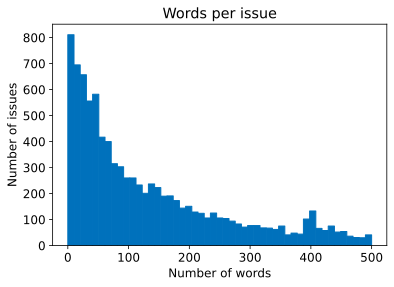

In [15]:
import numpy as np
import matplotlib.pyplot as plt

(df_issues["text"].str.split().apply(len).hist(bins=np.linspace(0, 500, 50), grid=False, edgecolor="C0"))
plt.title("Words per issue")
plt.xlabel("Number of words")
plt.ylabel("Number of issues")
plt.show()

Ïù¥ Î∂ÑÌè¨ÏóêÎäî ÎßéÏùÄ ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Î≥¥Ïù¥Îäî Î°±ÌÖåÏùº(long tail) ÌäπÏßïÏù¥ ÏûàÏùå

ÎåÄÎ∂ÄÎ∂ÑÏùò ÌÖçÏä§Ìä∏Í∞Ä Îß§Ïö∞ ÏßßÏßÄÎßå, 500 Îã®Ïñ¥Í∞Ä ÎÑòÎäî Ïù¥ÏäàÎèÑ ÏûàÏùå

  - ÌäπÌûà ÏóêÎü¨ Î©îÏãúÏßÄÎÇò ÏΩîÎìúÎ•º Ìï®Íªò Ìè¨Ïä§ÌåÖÌïòÎ©¥ Î≥¥ÌÜµ Ïù¥ÏäàÏùò Í∏∏Ïù¥Í∞Ä Ïª§Ïßê
  - ÎåÄÎ∂ÄÎ∂ÑÏùò Ìä∏ÎûúÏä§Ìè¨Î®∏ Î™®Îç∏Ïùò Î¨∏Îß• ÌÅ¨Í∏∞Îäî 512Í∞ú ÌÜ†ÌÅ∞Ïù¥ÎÇò Í∑∏ Ïù¥ÏÉÅÏù¥Í∏∞ ÎïåÎ¨∏Ïóê ÏùºÎ∂Ä Í∏¥ Ïù¥ÏäàÎ•º ÏûòÎùºÎÇ¥Îäî Í≤ÉÏù¥ Ï†ÑÏ≤¥ ÏÑ±Îä•Ïóê ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ† Í≤É Í∞ôÏßÄ ÏïäÏùå

Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÇ¥Ìé¥Î≥¥Í≥† Ï†ïÏ†úÌñàÏúºÎãà, ÎßàÏßÄÎßâÏúºÎ°ú ÌõàÎ†® ÏÑ∏Ìä∏ÏôÄ Î∂ÑÎ•òÍ∏∞Î•º ÌèâÍ∞ÄÌï† Í≤ÄÏ¶ù ÏÑ∏Ìä∏Î•º Ï†ïÏùòÌï®

### 9.1.3 ÌõàÎ†® ÏÑ∏Ìä∏ ÎßåÎì§Í∏∞

Î™®Îì† Î†àÏù¥Î∏îÏóê ÎåÄÌï¥ Í∑†Ìòï Ïû°Ìûå ÎπÑÏú®ÏùÑ Î≥¥Ïû•ÌïòÏßÄ Î™ªÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Îã§Ï§ë Î†àÏù¥Î∏î Î¨∏Ï†úÏóêÏÑúÎäî ÌõàÎ†® ÏÑ∏Ìä∏ÏôÄ Í≤ÄÏ¶ù ÏÑ∏Ìä∏Î•º ÎßåÎì§Í∏∞Í∞Ä Ï°∞Í∏à ÍπåÎã§Î°úÏõÄ

Î®ºÏ†Ä pytorchÏôÄ tokenization Í∞ôÏùÄ Î†àÏù¥Î∏îÏùÑ Î™®Îç∏Ïù¥ Ï≤òÎ¶¨ Í∞ÄÎä•Ìïú Ìè¨Îß∑ÏúºÎ°ú Î≥ÄÌôò
Ïù¥Î•º ÏúÑÌï¥ ÏÇ¨Ïù¥ÌÇ∑Îü∞Ïùò MultiLabelBinarizer ÌÅ¥ÎûòÏä§ ÏÇ¨Ïö©
- Ïù¥ ÌÅ¥ÎûòÏä§Îäî Î†àÏù¥Î∏î Ïù¥Î¶ÑÏùò Î¶¨Ïä§Ìä∏Î•º Î∞õÍ≥† Î†àÏù¥Î∏îÏóê Ìï¥ÎãπÌïòÎäî ÏúÑÏπòÎäî 1, ÎÇòÎ®∏ÏßÄÎäî 0Ïù∏ Î≤°ÌÑ∞Î•º ÎßåÎì¨


In [16]:
# Î†àÏù¥Î∏î Ïù¥Î¶ÑÏùÑ IDÎ°ú Îß§ÌïëÌïòÍ∏∞ ÏúÑÌï¥ all_labels Î¶¨Ïä§Ìä∏Ïóê MultiLabelBinarizer ÌÅ¥ÎûòÏä§ Ï†ÅÏö©

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
mlb.fit([all_labels])
mlb.transform([["tokenization", "new model"], ["pytorch"]])

array([[0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0]])

ÏïûÏùò ÏòàÏóêÏÑú Ï≤´ Î≤àÏß∏ ÌñâÏùÄ Îëê Í∞úÏùò 1ÏùÑ Ìè¨Ìï®
- Í∞ÅÍ∞Å new modelÍ≥º tokenization Î†àÏù¥Î∏îÏóê Ìï¥Îãπ
- ÎëêÎ≤àÏß∏ ÌñâÏùÄ pytorch ÌïòÎÇòÎßå 1


scikit-multilearnÏùò iterative_train_test_split() Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î∂ÑÌï†

Ïù¥ Ìï®ÏàòÎäî Î†àÏù¥Î∏îÏùò Í∑†ÌòïÏùÑ Ïû°Í∏∞ ÏúÑÌï¥ Î∞òÎ≥µÏ†ÅÏúºÎ°ú ÌõàÎ†®/ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Î•º ÎßåÎì¶
- Ïù¥ Ìï®ÏàòÎ•º DataFrameÏóê Ï†ÅÏö©ÌïòÍ∏∞ ÏúÑÌï¥ Î≥ÑÎèÑÏùò Ìï®ÏàòÎ°ú wrapping
- 2Ï∞®Ïõê ÌäπÏÑ± ÌñâÎ†¨ÏùÑ Í∏∞ÎåÄÌïòÎØÄÎ°ú Î∂ÑÌï†ÌïòÍ∏∞ Ï†ÑÏóê Ïù∏Îç±Ïä§ Î∞∞Ïó¥Ïóê Ï∞®ÏõêÏùÑ Ï∂îÍ∞ÄÌï®

In [17]:
from skmultilearn.model_selection import iterative_train_test_split

def balanced_split(df, test_size=0.5):
    ind = np.expand_dims(np.arange(len(df)), axis=1)
    labels = mlb.transform(df["labels"])
    ind_train, _, ind_test, _ = iterative_train_test_split(ind, labels,
                                                           test_size)
    return df.iloc[ind_train[:, 0]], df.iloc[ind_test[:,0]]

Î®ºÏ†Ä Îç∞Ïù¥ÌÑ∞Î•º ÏßÄÎèÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º ÎπÑÏßÄÎèÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÎÇòÎàî

Í∑∏ Îã§Ïùå balanced_split() Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ ÏßÄÎèÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÌõàÎ†® ÏÑ∏Ìä∏, Í≤ÄÏ¶ù ÏÑ∏Ìä∏, ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Î°ú Í∑†Ìòï ÏûàÍ≤å Î∂ÑÎ¶¨

In [18]:
from sklearn.model_selection import train_test_split

df_clean = df_issues[["text", "labels", "split"]].reset_index(drop=True).copy()
df_unsup = df_clean.loc[df_clean["split"] == "unlabeled", ["text", "labels"]]
df_sup = df_clean.loc[df_clean["split"] == "labeled", ["text", "labels"]]

np.random.seed(0)
df_train, df_tmp = balanced_split(df_sup, test_size=0.5)
df_valid, df_test = balanced_split(df_tmp, test_size=0.5)

ÎßàÏßÄÎßâÏúºÎ°ú ÏâΩÍ≤å Îç∞Ïù¥ÌÑ∞ ÏÖãÏùÑ ÌÜ†ÌÅ∞ÌôîÌïòÍ≥† TrainerÏôÄ ÌÜµÌï©ÌïòÍ∏∞ ÏúÑÌï¥ Î™®Îì† Î∂ÑÌï†ÏùÑ Îã¥ÏùÄ DatasetDict Í∞ùÏ≤¥Î•º ÏÉùÏÑ±

Ïó¨Í∏∞ÏÑúÎäî from_pandas() Î©îÏÑúÎìúÎ•º ÏÇ¨Ïö©Ìï¥ ÌåêÎã§Ïä§ DataFrameÏóêÏÑú Í∞Å Î∂ÑÌï†ÏùÑ Î∞îÎ°ú Î°úÎìúÌï®

- balanced_split() Ìï®ÏàòÎäî iterative_train_test_split()Ïóê Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÏßÅÏ†ë Ï†ÑÎã¨ÌïòÏßÄ ÏïäÍ≥† Ïù∏Îç±Ïä§Îßå Ï†ÑÎã¨
  + Ïù¥Î•º ÏúÑÌï¥ Ïó¥Ïóê Ìï¥ÎãπÌïòÎäî Ï∞®ÏõêÏùÑ Ï∂îÍ∞ÄÌï¥ 2Ï∞®Ïõê Î∞∞Ïó¥Î°ú ÎßåÎì§Ïñ¥Ïïº Ìï®. Í∑∏ Îã§Ïùå Î∞òÌôòÎêú Í∞Å Î∂ÑÌï†Ïùò Ïù∏Îç±Ïä§Î•º Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùò iloc Î©îÏÑúÎìúÏóê Ï†ÑÎã¨Ìï¥ ÌõàÎ†® ÏÑ∏Ìä∏ÏôÄ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Î•º ÎÇòÎàî.
  + Îòê Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ dfÏóê Î†àÏù¥Î∏î Ïó¥Ïù¥ Ïù¥ÎØ∏ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏúºÎØÄÎ°ú iterative_train_test_split()ÏóêÏÑú Î∞òÌôòÎêú Î†àÏù¥Î∏î Î∂ÑÌï†ÏùÄ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÍ≥† Î≤ÑÎ¶º

In [19]:
from datasets import Dataset, DatasetDict

ds = DatasetDict({
    "train": Dataset.from_pandas(df_train.reset_index(drop=True)),
    "valid": Dataset.from_pandas(df_valid.reset_index(drop=True)),
    "test": Dataset.from_pandas(df_test.reset_index(drop=True)),
    "unsup": Dataset.from_pandas(df_unsup.reset_index(drop=True))})

ÎßàÏßÄÎßâÏúºÎ°ú Î∂ÑÎ•òÍ∏∞Ïùò ÏÑ±Îä•ÏùÑ ÌõàÎ†® ÏÑ∏Ìä∏Ïùò ÌÅ¨Í∏∞Î≥ÑÎ°ú ÌèâÍ∞ÄÌïòÍ∏∞ ÏúÑÌï¥ ÌõàÎ†® Ïä¨ÎùºÏù¥Ïä§Î•º ÏÉùÏÑ±

### 9.1.4 ÌõàÎ†® Ïä¨ÎùºÏù¥Ïä§ ÎßåÎì§Í∏∞

Ï†ÅÏùÄ ÏñëÏùò Î†àÏù¥Î∏îÎßÅÎêú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏñºÎßàÎÇò Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ ÎÇ¥ÎäîÏßÄ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ ÏÉòÌîå Í∞úÏàòÍ∞Ä Îçî Ï†ÅÏùÄ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Ïä¨ÎùºÏù¥Ïä§Î•º ÏÉùÏÑ±
- iterative_train_test_split() Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Î†àÏù¥Î∏îÎßàÎã§ Ïó¨Îçü Í∞ú ÏÉòÌîåÎ°ú ÏãúÏûëÌï¥ÏÑú Ï†ÑÏ≤¥ ÌõàÎ†® ÏÑ∏Ìä∏Î•º Îã¥ÏùÄ Ïä¨ÎùºÏù¥Ïä§ÍπåÏßÄ ÏÉùÏÑ±

In [20]:
np.random.seed(0)
all_indices = np.expand_dims(list(range(len(ds["train"]))), axis=1)
indices_pool = all_indices
labels = mlb.transform(ds["train"]["labels"])
train_samples = [8, 16, 32, 64, 128]
train_slices, last_k = [], 0

for i, k in enumerate(train_samples):
    # Îã§Ïùå Ïä¨ÎùºÏù¥Ïä§ ÌÅ¨Í∏∞Î•º Ï±ÑÏö∞ÎäîÎç∞ ÌïÑÏöîÌïú ÏÉòÌîåÏùÑ Î∂ÑÌï†Ìï©ÎãàÎã§
    indices_pool, labels, new_slice, _ = iterative_train_test_split(
        indices_pool, labels, (k-last_k)/len(labels))
    last_k = k
    if i==0: train_slices.append(new_slice)
    else: train_slices.append(np.concatenate((train_slices[-1], new_slice)))

# ÎßàÏßÄÎßâ Ïä¨ÎùºÏù¥Ïä§Î•º Ìè¨Ìï®ÌïòÎ©¥ ÏΩîÎû©Ïùò Í≤ΩÏö∞ Î©îÎ™®Î¶¨ Î∂ÄÏ°±Ïù¥ Î∞úÏÉùÌï©ÎãàÎã§.
# ÎåÄÏã† ÏΩîÎû© ÌîÑÎ°ú(https://colab.research.google.com/signup)Î•º ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.
# ÏΩîÎû©ÏùÑ ÏÇ¨Ïö©ÌïòÎ†§Î©¥ Îã§Ïùå ÎùºÏù∏ÏùÑ Ï£ºÏÑù Ï≤òÎ¶¨ÌïòÏÑ∏Ïöî.
train_slices.append(all_indices), train_samples.append(len(ds["train"]))

train_slices = [np.squeeze(train_slice) for train_slice in train_slices]

Ïù¥Îü∞ Î∞òÎ≥µÏ†ÅÏù∏ Î∞©ÏãùÏùÄ ÏõêÌïòÎäî ÌÅ¨Í∏∞Ïóê Í∑ºÏÇ¨ÌïòÍ≤åÎßå ÏÉòÌîåÏùÑ ÎÇòÎàî

Ï£ºÏñ¥ÏßÑ ÌÅ¨Í∏∞Ïóê ÎßûÎäî Í∑†Ìòï Ïû°Ìûå Î∂ÑÌï†ÏùÑ Íµ¨ÌïòÎäî Í≤ÉÏù¥ Ìï≠ÏÉÅ Í∞ÄÎä•ÌïòÏßÄÎäî ÏïäÍ∏∞ ÎïåÎ¨∏ÏûÑ

In [21]:
print("Î™©Ìëú Î∂ÑÌï† ÌÅ¨Í∏∞:")
print(train_samples)
print("Ïã§Ï†ú Î∂ÑÌï† ÌÅ¨Í∏∞:")
print([len(x) for x in train_slices])

Î™©Ìëú Î∂ÑÌï† ÌÅ¨Í∏∞:
[8, 16, 32, 64, 128, 223]
Ïã§Ï†ú Î∂ÑÌï† ÌÅ¨Í∏∞:
[10, 19, 36, 68, 134, 223]


ÏãúÍ∞ÅÌôî Ïãú Î™©Ìëú Î∂ÑÌï† ÌÅ¨Í∏∞Î•º xÏ∂ïÏúºÎ°ú ÏÇ¨Ïö©

## 9.2 ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à Î™®Îç∏ ÎßåÎì§Í∏∞

Î≤†Ïù¥Ïä§ ÎùºÏù∏ Î™®Îç∏ ÏÑ§Ï†ïÏùò ÌïÑÏöîÏÑ±

1. Ï†ïÍ∑ú ÌëúÌòÑÏãù, ÏàòÎèô Í∑úÏπô ÎòêÎäî Îß§Ïö∞ Í∞ÑÎã®Ìïú Î™®Îç∏ÏùÑ Í∏∞Î∞òÏúºÎ°ú ÌïòÎäî Í∏∞Ï§Ä Î™®Îç∏Ïù¥ Ïã§Ï†úÎ°ú Î¨∏Ï†úÎ•º Ïûò Ìï¥Í≤∞ÌïòÍ∏∞ÎèÑ Ìï®. Ïù¥ Í≤ΩÏö∞ Ìä∏ÎûúÏä§Ìè¨Î®∏ÏôÄ Í∞ôÏùÄ Î≥µÏû°Ìïú Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï† ÌïÑÏöîÍ∞Ä ÏóÜÏùå

2. Î≥µÏû°Ìïú Î™®Îç∏ÏùÑ ÌÉêÏÉâÌï† Îïå Í∏∞Ï§Ä Î™®Îç∏Ïù¥ Í∞ÑÎã®Ìïú Í≤ÄÏ¶ù Ïó≠Ìï†ÏùÑ ÏàòÌñâÌï®
  - ÏòàÎ•º Îì§Ïñ¥ BERT-large Î™®Îç∏ÏùÑ ÌõàÎ†®ÌïòÍ≥† Í≤ÄÏ¶ù ÏÑ∏Ìä∏ÏóêÏÑú 80% Ï†ïÌôïÎèÑÎ•º ÏñªÏùÄ Í≤ΩÏö∞, Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÏôÄ Í∞ôÏùÄ Î≤†Ïù¥Ïä§ ÎùºÏù∏ Î™®Îç∏Ïùò Î∂ÑÎ•òÍ∏∞Í∞Ä 95%Ïùò Ï†ïÌôïÎèÑÎ•º Îã¨ÏÑ±ÌñàÎã§Î©¥ ÎÅùÍπåÏßÄ ÎîîÎ≤ÑÍπÖÏùÑ Ïã§ÏãúÌïòÎäî ÎÖ∏Î†•ÏùÑ Ï∂îÍ∞ÄÌïòÍ≤å Îê®

Ïó¨Í∏∞ÏÑú ÏÇ¨Ïö©Ìïú Î≤†Ïù¥Ïä§ ÎùºÏù∏ Î™®Îç∏ÏùÄ ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à Î∂ÑÎ•òÍ∏∞(Naive Bayes Classifier)ÏûÑ

- Ïù¥ Î™®Îç∏ÏùÄ Í∞ÑÎã®ÌïòÍ≥† ÌõàÎ†® ÏÜçÎèÑÍ∞Ä Îπ†Î•¥Î©∞ ÏûÖÎ†•Ïùò Î≥ÄÎèôÏóê Îß§Ïö∞ ÏïàÏ†ïÏ†Å
- scikit-multilearn ÎùºÏù¥Î∏åÎü¨Î¶¨Î•¥ ÏÇ¨Ïö©Ìï¥ Ïù¥ Î¨∏Ï†úÎ•º OvR(One-versus-Rest) Î∂ÑÎ•ò ÏûëÏóÖÏúºÎ°ú Î≥ÄÌôò
- Ïù¥ Î∞©ÏãùÏùÄ LÍ∞úÏùò Î†àÏù¥Î∏îÏùÑ ÏúÑÌï¥ LÍ∞úÏùò Ïù¥ÏßÑ Î∂ÑÎ•òÍ∏∞Î•º ÌõàÎ†®


In [22]:
# Î®ºÏ†Ä MultiLabelBinarizer Í∞ùÏ≤¥Î•º ÏÇ¨Ïö©Ìï¥ ÏÉàÎ°úÏö¥ ÌõàÎ†® ÏÑ∏Ìä∏Ïóê label_ids Ïó¥ÏùÑ ÏÉùÏÑ±
# map() Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Î™®Îì† Ï≤òÎ¶¨Î•º Ìïú Î≤àÏóê ÏàòÌñâÌï®

def prepare_labels(batch):
    batch["label_ids"] = mlb.transform(batch["labels"])
    return batch

ds = ds.map(prepare_labels, batched=True)

Map:   0%|          | 0/223 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/111 [00:00<?, ? examples/s]

Map:   0%|          | 0/9303 [00:00<?, ? examples/s]

Î∂ÑÎ•òÍ∏∞ ÏÑ±Îä• ÌèâÍ∞ÄÎäî ÎßàÏù¥ÌÅ¨Î°ú, Îß§ÌÅ¨Î°ú F-1 Ïä§ÏΩîÏñ¥Î•º ÏÇ¨Ïö©
- ÎßàÏù¥ÌÅ¨Î°ú F-1 Ïä§ÏΩîÏñ¥Îäî ÏûêÏ£º Îì±Ïû•ÌïòÎäî Î†àÏù¥Î∏îÏóê ÎåÄÌïú ÏÑ±Îä•ÏùÑ Ï∂îÏ†ÅÌïòÍ≥†
- Îß§ÌÅ¨Î°ú F-1 Ïä§ÏΩîÏñ¥Îäî ÎπàÎèÑÎ•º Î¨¥ÏãúÌïòÍ≥† Î™®Îì† Î†àÏù¥Î∏îÏóê ÎåÄÌïú ÏÑ±Îä•ÏùÑ ÌèâÍ∑†

Í∞Å Î™®Îç∏ÏùÑ Îã§Î•∏ ÌÅ¨Í∏∞Ïùò ÌõàÎ†® Î∂ÑÌï†ÏóêÏÑú ÌèâÍ∞ÄÌï† Í≤ÉÏù¥ÎØÄÎ°ú defaultdictÎ°ú Í∞Å Î∂ÑÌï†Ïùò Ï†êÏàòÎ•º Îã¥ÏùÑ Î¶¨Ïä§Ìä∏Î•º ÏÉùÏÑ±

In [23]:
from collections import defaultdict

macro_scores, micro_scores = defaultdict(list), defaultdict(list)

Î™®Îç∏ ÌõàÎ†® Î∞è ÌõàÎ†® ÌèâÍ∞Ä Ïã§Ïãú

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.feature_extraction.text import CountVectorizer

for train_slice in train_slices:
    # ÌõàÎ†® Ïä¨ÎùºÏù¥Ïä§ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º Ï§ÄÎπÑÌï©ÎãàÎã§
    ds_train_sample = ds["train"].select(train_slice)
    y_train = np.array(ds_train_sample["label_ids"])
    y_test = np.array(ds["test"]["label_ids"])
    # Í∞ÑÎã®Ìïú CountVectorizerÎ•º ÏÇ¨Ïö©Ìï¥ ÌÖçÏä§Ìä∏Î•º ÌÜ†ÌÅ∞ Ïπ¥Ïö¥Ìä∏Î°ú Ïù∏ÏΩîÎî©Ìï©ÎãàÎã§
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(ds_train_sample["text"])
    X_test_counts = count_vect.transform(ds["test"]["text"])
    # Î™®Îç∏ÏùÑ ÎßåÎì§Í≥† ÌõàÎ†®Ìï©ÎãàÎã§!
    classifier = BinaryRelevance(classifier=MultinomialNB())
    classifier.fit(X_train_counts, y_train)
    # ÏòàÏ∏°ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† ÌèâÍ∞ÄÌï©ÎãàÎã§
    y_pred_test = classifier.predict(X_test_counts)
    clf_report = classification_report(
        y_test, y_pred_test, target_names=mlb.classes_, zero_division=0,
        output_dict=True)
    # ÌèâÍ∞Ä Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï©ÎãàÎã§
    macro_scores["Naive Bayes"].append(clf_report["macro avg"]["f1-score"])
    micro_scores["Naive Bayes"].append(clf_report["micro avg"]["f1-score"])

ÏΩîÎìú Íµ¨Îèô ÏõêÎ¶¨

1. ÌõàÎ†® Ïä¨ÎùºÏù¥Ïä§ Ï§ÄÎπÑ Î∞è Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©

2. CountVectorizer ÏÇ¨Ïö© ÌÖçÏä§Ìä∏ Ïù∏ÏΩîÎî©

3. Îã®ÏàúÌïòÍ≤å Ïñ¥ÌúòÏÇ¨Ï†Ñ ÌÅ¨Í∏∞Ïùò Î≤°ÌÑ∞Î•º ÏÉùÏÑ±
  - Ïù¥ Î≤°ÌÑ∞Ïùò Í∞Å ÏõêÏÜåÎäî ÌÖçÏä§Ìä∏Ïóê Îì±Ïû•Ìïú ÌÜ†ÌÅ∞Ïùò ÎπàÎèÑ
  - Îã®Ïñ¥ ÏàúÏÑú Ï†ïÎ≥¥Í∞Ä Î™®Îëê ÏóÜÏñ¥ÏßÄÍ∏∞ ÎïåÎ¨∏Ïóê BoW(Bag-of-Words) Î∞©Ïãù

4. Í∑∏ Îã§Ïùå Î∂ÑÎ•òÍ∏∞Î•º ÌõàÎ†®ÌïòÍ≥† ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú ÏòàÏ∏°ÏùÑ ÎßåÎì† ÌõÑÏóê classification_report() Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ ÎßàÏù¥ÌÅ¨Î°úÏôÄ Îß§ÌÅ¨Î°ú f-1 Ï†êÏàòÎ•º Ï∏°Ï†ï

In [25]:
import matplotlib.pyplot as plt

def plot_metrics(micro_scores, macro_scores, sample_sizes, current_model):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

    for run in micro_scores.keys():
        if run == current_model:
            ax0.plot(sample_sizes, micro_scores[run], label=run, linewidth=2)
            ax1.plot(sample_sizes, macro_scores[run], label=run, linewidth=2)
        else:
            ax0.plot(sample_sizes, micro_scores[run], label=run,
                     linestyle="dashed")
            ax1.plot(sample_sizes, macro_scores[run], label=run,
                     linestyle="dashed")

    ax0.set_title("Micro F1 scores")
    ax1.set_title("Macro F1 scores")
    ax0.set_ylabel("Test set F1 score")
    ax0.legend(loc="lower right")
    for ax in [ax0, ax1]:
        ax.set_xlabel("Number of training samples")
        ax.set_xscale("log")
        ax.set_xticks(sample_sizes)
        ax.set_xticklabels(sample_sizes)
        ax.minorticks_off()
    plt.tight_layout()
    plt.show()

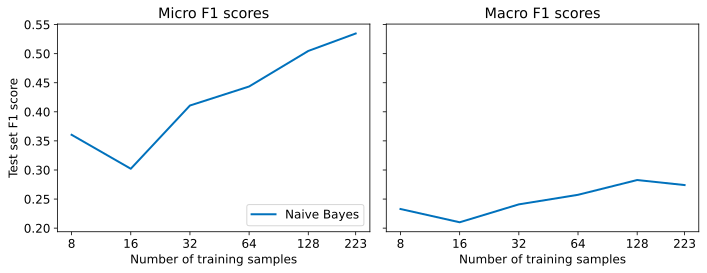

In [26]:
plot_metrics(micro_scores, macro_scores, train_samples, "Naive Bayes")

ÏïûÏùò Í∑∏ÎûòÌîÑÎäî ÏÉòÌîå Í∞úÏàòÎ•º Î°úÍ∑∏ Ïä§ÏºÄÏùºÎ°ú ÌëúÌòÑ

Í∑∏ÎûòÌîÑÎ•º Î≥¥Î©¥ ÌõàÎ†® ÏÉòÌîåÍ∞úÏàòÏùò Ï¶ùÍ∞ÄÏóê Îî∞Îùº ÎßàÏù¥ÌÅ¨Î°úÏôÄ Îß§ÌÅ¨Î°ú F-1 Ï†êÏàòÍ∞Ä Î™®Îëê Ìñ•ÏÉÅ

- ÌõàÎ†® ÏÉòÌîåÏù¥ ÎÑàÎ¨¥ Ï†ÅÏúºÎ©¥ Ïä¨ÎùºÏù¥Ïä§ ÎßàÎã§ ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨Í∞Ä Îã¨ÎùºÏ†∏ Í≤∞Í≥ºÏóê ÏïΩÍ∞ÑÏùò Ïû°ÏùåÏù¥ ÏÉùÏÑ±Îê®

## 9.3 Î†àÏù¥Î∏îÏù¥ ÏóÜÎäî Îç∞Ïù¥ÌÑ∞ Îã§Î£®Í∏∞

Î†àÏù¥Î∏îÎßÅÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÎäî Í≤ΩÏö∞ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî Ï≤´Î≤àÏß∏ Î∞©Î≤ïÏùÄ

1. Ï†úÎ°úÏÉ∑ Î∂ÑÎ•ò(zero-shot classification)

  - Ï†úÎ°úÏÉ∑ Î∂ÑÎ•òÎäî ÏûëÏóÖÎ≥Ñ ÎßêÎ≠âÏπòÏóêÏÑú Ï∂îÍ∞ÄÎ°ú ÎØ∏ÏÑ∏ ÌäúÎãùÌïòÏßÄ ÏïäÍ≥† ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Î™©Ìëú
    + Ïù¥ Î∞©ÏãùÏùÑ Ïûò Ïù¥Ìï¥ÌïòÎ†§Î©¥ BERTÏôÄ Í∞ôÏùÄ Ïñ∏Ïñ¥ Î™®Îç∏Ïù¥ ÏàòÏ≤ú Í∂åÏùò Ï±ÖÍ≥º ÏúÑÌÇ§ÌîºÎîîÏïÑÏùò ÎåÄÍ∑úÎ™® Îç§ÌîÑÏóêÏÑú ÌÖçÏä§Ìä∏Ïóê ÏûàÎäî ÎßàÏä§ÌÇπÎêú ÌÜ†ÌÅ∞ÏùÑ ÏòàÏ∏°ÌïòÎèÑÎ°ù ÏÇ¨Ï†Ñ ÌõàÎ†®ÎêêÎã§Îäî ÏÇ¨Ïã§ÏùÑ Í∏∞Ïñµ
    + ÎàÑÎùΩÎêú ÌÜ†ÌÅ∞ÏùÑ Ïûò ÏòàÏ∏°ÌïòÎ†§Î©¥ Î™®Îç∏ÏùÄ Î¨∏Îß•Ïóê ÏûàÎäî Ï£ºÏ†úÎ•º Ïù∏ÏãùÌï¥Ïïº Ìï®

  - Í∞ÑÎã®Ìïú ÏòàÏãú
    + Í∞ÄÎ†π Îëê ÏïÑÏù¥Í∞Ä ÏûàÎäîÎç∞, Ìïú ÏïÑÏù¥Îäî ÏûêÎèôÏ∞® ÏòÅÌôîÎ•º Ï¢ãÏïÑÌïòÍ≥† Îã§Î•∏ ÏïÑÏù¥Îäî ÎèôÎ¨º ÏòÅÌôîÎ•º Ï¢ãÏïÑÌï®
    + Ïù¥ÎØ∏ Í∞úÎ¥âÎêú ÏòÅÌôîÎäî Î™®Îëê Î¥§ÏúºÎãà, ÏÉà ÏòÅÌôîÏùò Ï£ºÏ†úÍ∞Ä Ïñ¥Îñ§ Í≤ÉÏù∏ÏßÄ ÏïåÎ†§Ï£ºÎäî Ìï®ÏàòÎ•º ÎßåÎì§Î†§Í≥† Ìï®
    + ÏûêÏó∞Ïä§ÎüΩÍ≤å Ïù¥ ÏûëÏóÖÏóê Ìä∏ÎûúÏä§Ìè¨Î®∏Î•º ÏÇ¨Ïö©
    

In [27]:
# Î®ºÏ†Ä, ÎßàÏä§ÌÅ¨Îìú Ïñ∏Ïñ¥ Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï¥ ÎßàÏä§ÌÇπÎêú ÌÜ†ÌÅ∞ ÎÇ¥Ïö©ÏùÑ ÏòàÏ∏°ÌïòÎäî fill-mask ÌååÏù¥ÌîÑÎùºÏù∏Ïóê BERT Î≤†Ïù¥Ïä§ Î™®Îç∏ÏùÑ Î°úÎìúÌï®

from transformers import pipeline

pipe = pipeline("fill-mask", model="bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Í∑∏ Îã§Ïùå ÏïΩÍ∞ÑÏùò ÏòÅÌôî ÏÑ§Î™ÖÏùÑ ÏûëÏÑ±ÌïòÍ≥† ÎßàÏä§ÌÇπÎêú Îã®Ïñ¥Î•º ÏúÑÌïú ÌîÑÎ°¨ÌîÑÌä∏Î•º Ï∂îÍ∞Ä

Ïù¥ ÌîÑÎ°¨ÌîÑÌä∏Îäî Î™®Îç∏Ïù¥ Î∂ÑÎ•òÌïòÎèÑÎ°ù ÏïàÎÇ¥ÌïòÎäî Ïó≠Ìï†ÏùÑ Ìï®

fill-mask ÌååÏù¥ÌîÑ ÎùºÏù∏ÏùÄ ÎßàÏä§ÌÇπÎêú ÏúÑÏπòÏóê ÎÜìÍ∏∞Ïóê Í∞ÄÏû• Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùÄ ÌÜ†ÌÅ∞ÏùÑ Î∞òÌôòÌï®


In [28]:
movie_desc = "The main characters of the movie madacascar \
are a lion, a zebra, a giraffe, and a hippo. "
prompt = "The movie is about [MASK]."

output = pipe(movie_desc + prompt)
for element in output:
    print(f"ÌÜ†ÌÅ∞ {element['token_str']}:\t{element['score']:.3f}%")

ÌÜ†ÌÅ∞ animals:     0.103%
ÌÜ†ÌÅ∞ lions:       0.066%
ÌÜ†ÌÅ∞ birds:       0.025%
ÌÜ†ÌÅ∞ love:        0.015%
ÌÜ†ÌÅ∞ hunting:     0.013%


ÌôïÏã§Ìûà Ïù¥ Î™®Îç∏ÏùÄ ÎèôÎ¨ºÏóê Í¥ÄÌïú ÌÜ†ÌÅ∞Îßå ÏòàÏ∏°Ìï®

Î∞©ÏãùÏùÑ Î∞îÍøî Í∞ÄÏû• Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùÄ ÌÜ†ÌÅ∞ÏùÑ ÏñªÎäî ÎåÄÏã† Ï£ºÏñ¥ÏßÑ ÌÜ†ÌÅ∞Ïóê ÎåÄÌïú ÌôïÎ•†ÏùÑ Ï∂úÎ†•ÌïòÎèÑÎ°ù ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ Ïã§Ìñâ

- Ïó¨Í∏∞ÏÑúÎäî carsÏôÄ animalsÎ•º ÏÑ†ÌÉùÌï¥ ÌÉÄÍπÉÏúºÎ°ú ÌååÏù¥ÌîÑÎùºÏù∏Ïóê Ï†ÑÎã¨

In [29]:
output = pipe(movie_desc + prompt, targets=["animals", "cars"])
for element in output:
    print(f"ÌÜ†ÌÅ∞ {element['token_str']}:\t{element['score']:.3f}%")

ÌÜ†ÌÅ∞ animals:     0.103%
ÌÜ†ÌÅ∞ cars:        0.001%


ÎãπÏó∞Ìûà cars ÌÜ†ÌÅ∞Ïóê ÎåÄÌïú ÏòàÏ∏° ÌôïÎ•†ÏùÄ animals Î≥¥Îã§ Ìõ®Ïî¨ Îçî ÎÇÆÏùå

ÏûêÎèôÏ∞®Ïóê Í¥ÄÎ†®Îêú ÏÑ§Î™ÖÏóêÏÑúÎèÑ Ïûò ÎèôÏûëÌïòÎäîÏßÄ ÌôïÏù∏

In [30]:
movie_desc = "In the movie transformers aliens \
can morph into a wide range of vehicles."

output = pipe(movie_desc + prompt, targets=["animals", "cars"])
for element in output:
    print(f"ÌÜ†ÌÅ∞ {element['token_str']}:\t{element['score']:.3f}%")

ÌÜ†ÌÅ∞ cars:        0.139%
ÌÜ†ÌÅ∞ animals:     0.006%


ÏúÑ ÏòàÏ†úÎäî ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú Î™®Îç∏ÏùÑ Ï∂îÍ∞Ä ÌõàÎ†®ÏóÜÏù¥ Îã§Î•∏ ÏûëÏóÖÏóê Ï†ÅÏö©ÌïòÎäî Î∞©Î≤ïÏùÑ Î≥¥Ïó¨Ï§å
- Ïù¥Îäî Ïù¥ Ïû•ÏóêÏÑú ÏÜåÍ∞úÌï† ÎßéÏùÄ Î∞©Î≤ïÎì§Ïùò ÌïµÏã¨ ÏïÑÏù¥ÎîîÏñ¥
- Ïù¥ ÏòàÎäî Î∂ÑÎ•òÏóê ÎßàÏä§ÌÅ¨Îìú Ïñ∏Ïñ¥ Î™®Îç∏ÏùÑ Î∞îÎ°ú ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ ÎßàÏä§ÌÇπÎêú ÌîÑÎ°¨ÌîÑÌä∏Î•º ÎßåÎì¨

ÌÖçÏä§Ìä∏ Î∂ÑÎ•òÏóê Ï¢Ä Îçî Í∞ÄÍπåÏö¥ ÏûëÏóÖÏù∏ ÏûêÏó∞Ïñ¥ Ï∂îÎ°†(Natural Language Inference)ÏóêÏÑú ÎØ∏ÏÑ∏ ÌäúÎãùÎêú Î™®Îç∏ÏùÑ Ï†ÅÏö©ÌïòÎ©¥ Í≤∞Í≥ºÍ∞Ä Îçî Ï¢ãÏùÄÏßÄ ÏïåÏïÑÎ≥¥Í≤†Ïùå
- Î∂ÑÎ•òÌï† Îïå ÎßàÏä§ÌÅ¨Îìú Ïñ∏Ïñ¥ Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏßÄÎßå, Ï¢Ä Îçî ÎπÑÏä∑Ìïú ÏûëÏóÖÏóêÏÑú ÌõàÎ†®Îêú Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Îçî Ï¢ãÏùÑ ÎïåÎèÑ ÏûàÏùå
- Î∞îÎ°ú **ÌÖçÏä§Ìä∏ Ìï®Ïùò(text entailment)** ÎùºÎäî ÏûëÏóÖ
- ÌÖçÏä§Ìä∏ Ìï®ÏùòÏóêÏÑúÎäî Î™®Îç∏Ïù¥ Îëê Í∞úÏùò ÌÖçÏä§Ìä∏ Íµ¨Ï†àÏù¥ ÏÑúÎ°ú Ïó∞Í≤∞ÎêòÎäîÏßÄ ÏïÑÎãàÎ©¥ Î™®ÏàúÎêòÎäîÏßÄ ÌåêÎã®Ìï®
- Î™®Îç∏ÏùÄ ÏùºÎ∞òÏ†ÅÏúºÎ°ú **MNLI**(Multi-Genre NLI) ÎßêÎ≠âÏπòÎÇò **XNLI**(Cross-Lingual NLI) ÎßêÎ≠âÏπò Í∞ôÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ìï®ÏùòÏôÄ Î™®ÏàúÏùÑ Í∞êÏßÄÌïòÎèÑÎ°ù ÌõàÎ†®Îê®


Ïù¥ Îç∞Ïù¥ÌÑ∞ ÏÖãÏóê ÏûàÎäî Í∞Å ÏÉòÌîåÏùÄ Ï†ÑÏ†ú(premise), Í∞ÄÏÑ§(hypotheis), Î†àÏù¥Î∏î(label) ÏÑ∏ Î∂ÄÎ∂ÑÏúºÎ°ú Íµ¨ÏÑ±Îê®

- Î†àÏù¥Î∏îÏùÄ **entailment**, **neutral**, **contardiction** Ï§ë ÌïòÎÇòÏûÑ
  +  **(entailment Î†àÏù¥Î∏î)** Ï†ÑÏ†ú Ï°∞Í±¥ÌïòÏóêÏÑú Í∞ÄÏÑ§ ÌÖçÏä§Ìä∏Í∞Ä Í±∞ÏßìÏù¥Í±∞ÎÇò Î∂ÄÏ†ÅÌï©Ìï†Îïå ÏÇ¨Ïö©Îê®
  + **(contradiction Î†àÏù¥Î∏î)** Ï†ÑÏ†ú Ï°∞Í±¥ÌïòÏóêÏÑú Í∞ÄÏÑ§ ÌÖçÏä§Ìä∏Í∞Ä Í±∞ÏßìÏù¥Í±∞ÎÇò Î∂ÄÏ†ÅÌï©Ìï† Îïå ÏÇ¨Ïö©Îê®
  + **(neutral Î†àÏù¥Î∏î)** Ïù¥Îü∞ Îëê Í≤ΩÏö∞Ïóê Ìï¥ÎãπÌïòÏßÄ ÏïäÏúºÎ©¥ neutral Î†àÏù¥Î∏îÏù¥ Ìï†ÎãπÎê®






**[Ìëú 9-1]** MLNI Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÏûàÎäî ÏÑ∏ Í∞ÄÏßÄ ÌÅ¥ÎûòÏä§

|Ï†ÑÏ†ú | Í∞ÄÏÑ§ | Î†àÏù¥Î∏î |
|:----|:-----|:------|
|His favourite color is blue. | He is into heavy metal music | **neutral** |
|She finds the joke hilarious. | She thinks the joke is not funny at all. | **contradiction**|
|The house was recently built. | The house is new. | **entailment** |


MLNI Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÌõàÎ†®Ìïú Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïñ¥Îñ§ Î†àÏù¥Î∏îÎèÑ ÌïÑÏöîÌïòÏßÄ ÏïäÏùÄ Î∂ÑÎ•òÍ∏∞Î•º ÎßåÎì§Ïàò ÏûàÏùå! ÌïµÏã¨ ÏïÑÏù¥ÎîîÏñ¥Îäî Î∂ÑÎ•òÌïòÍ≥†Ïûê ÌïòÎäî ÌÖçÏä§Ìä∏Î•º Ï†ÑÏ†úÎ°ú ÏÇ¨Ïö©Ìï¥ Îã§ÏùåÍ≥º Í∞ôÏùÄ Í∞ÄÏÑ§ÏùÑ ÎßåÎìúÎäî Í≤É

"This example is about `{label}`."

`{label}`ÏóêÎäî ÌÅ¥ÎûòÏä§ Ïù¥Î¶ÑÏùÑ ÎÑ£Ïùå

Ìï®Ïùò Ï†êÏàòÎäî Ï†ÑÏ†úÍ∞Ä Ï£ºÏ†úÏôÄ ÏñºÎßàÎÇò Í¥ÄÎ†®ÎêòÎäîÏßÄ ÏïåÎ†§Ï§å

Ïù¥Î•º Ïó¨Îü¨ ÌÅ¥ÎûòÏä§Ïóê ÏàúÏ∞®Ï†ÅÏúºÎ°ú Ïã§ÌñâÌï®. Ïù¥ Î∞©ÏãùÏùÄ ÌÅ¥ÎûòÏä§ÎßàÎã§ Ï†ïÎ∞©Ìñ• Ìå®Ïä§Î•º Ïã§ÌñâÌïòÎØÄÎ°ú ÏùºÎ∞òÏ†ÅÏù∏ Î∂ÑÎ•òÍ∏∞Î≥¥Îã§ Îçú Ìö®Ïú®Ï†Å.

Îòê Î†àÏù¥Î∏î Ïù¥Î¶Ñ ÏÑ†ÌÉùÏù¥ Ï†ïÌôïÎèÑÏóê ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎØÄÎ°ú Ïù¥ Ï†êÏùÑ Ï£ºÏùòÌï¥Ïïº Ìï®
ÎåÄÏ≤¥Î°ú ÏùòÎØ∏ ÏûàÎäî Ïù¥Î¶ÑÏùÑ ÏÑ†ÌÉùÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏùå
- ÏòàÎ•º Îì§Ïñ¥ Î†àÏù¥Î∏îÏùÑ Îã®ÏàúÌûà Class 1Ïù¥Îùº ÌïòÎ©¥ Ïñ¥Îñ§ ÏùòÎØ∏Ïù∏ÏßÄ Î™®Îç∏Ïù¥ ÏïåÏßÄ Î™ªÌïòÍ≥† Î™®ÏàúÏù∏ÏßÄ Ìï®Ïùò Ïù∏ÏßÄÏóê ÎåÄÌïú ÌûåÌä∏Î•º ÏñªÏßÄ Î™ªÌï®

In [31]:
# ÌóàÍπÖÌéòÏù¥Ïä§ Ìä∏ÎûúÏä§Ìè¨Î®∏Ïä§ÏóêÎäî Ï†úÎ°úÏÉ∑ Î∂ÑÎ•òÎ•º ÏúÑÌïú MLNI Î™®Îç∏Ïù¥ ÎÇ¥Ïû•Îê®
# Îã§ÏùåÏ≤òÎüº ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÏÇ¨Ïö©Ìï¥ Ï¥àÍ∏∞Ìôî Ìï®

from transformers import pipeline

# CPUÏóêÏÑú Ïã§ÌñâÌïòÎ†§Î©¥ device=0ÏùÑ ÏÇ≠Ï†úÌïòÏÑ∏Ïöî.
pipe = pipeline("zero-shot-classification", device=0)

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

- device=0ÏúºÎ°ú ÏÑ§Ï†ïÌïòÎ©¥ Ï∂îÎ°† ÏÜçÎèÑÎ•º ÎÜíÏù¥Í∏∞ ÏúÑÌï¥ Í∏∞Î≥∏ CPU ÎåÄÏã† GPUÏóêÏÑú Î™®Îç∏ÏùÑ Ïã§ÌñâÌï®

- ÌÖçÏä§Ìä∏Î•º Î∂ÑÎ•òÌïòÎ†§Î©¥ Î†àÏù¥Î∏î Ïù¥Î¶ÑÍ≥º Ìï®Íªò ÌååÏù¥ÌîÑÎùºÏù∏Ïóê Ï†ÑÎã¨Îê®

- milti_label=TrueÎ°ú ÏßÄÏ†ïÌïòÎ©¥ Îã®Ïùº Î†àÏù¥Î∏î Î∂ÑÎ•òÎ•º ÏúÑÌïú ÏµúÎåìÍ∞íÏù¥ ÏïÑÎãàÎùº Î™®Îì† Ï†êÏàòÍ∞Ä Î∞òÌôòÎê®

  + Îã®Ïùº Î†àÏù¥Î∏îÏùò Î∞òÌôò Í∞íÏùÄ ÌÅ¥ÎûòÏä§Î≥Ñ ÌôïÎ•†Ïùò Ìï©Ïù¥ 1Ïù¥ Îê®. Îã§Ï§ë Î†àÏù¥Î∏î Î∂ÑÎ•òÏóêÏÑúÎäî Ïó¨Îü¨ ÌÅ¥ÎûòÏä§Ïùò ÌôïÎ•†Ïù¥ 1Ïóê Í∞ÄÍπåÏõåÏßÄÎ©¥ Ï†ÑÏ≤¥ ÌôïÎ•†Ïùò Ìï©Ïù¥ 1ÏùÑ ÎÑòÏùÑ ÏàòÎèÑ ÏûàÏùå

In [32]:
sample = ds["train"][0]
print(f"Î†àÏù¥Î∏î: {sample['labels']}")
output = pipe(sample["text"], all_labels, multi_label=True)
print(output["sequence"][:400])
print("\nÏòàÏ∏°:")

for label, score in zip(output["labels"], output["scores"]):
    print(f"{label}, {score:.2f}")

Î†àÏù¥Î∏î: ['new model']
Add new CANINE model

# üåü New model addition

## Model description

Google recently proposed a new **C**haracter **A**rchitecture with **N**o
tokenization **I**n **N**eural **E**ncoders architecture (CANINE). Not only the
title is exciting:

> Pipelined NLP systems have largely been superseded by end-to-end neural
modeling, yet nearly all commonly-used models still require an explicit tokeni

ÏòàÏ∏°:
new model, 0.98
tensorflow or tf, 0.37
examples, 0.34
usage, 0.30
pytorch, 0.25
documentation, 0.25
model training, 0.24
tokenization, 0.17
pipeline, 0.16


**Note** Î∂ÄÎ∂ÑÎã®Ïñ¥ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ•º ÏÇ¨Ïö©ÌïòÎØÄÎ°ú Î™®Îç∏Ïóê ÏΩîÎìúÎ•º Ï†ÑÎã¨Ìï† ÏàòÎèÑ ÏûàÏùå! Ï†úÎ°úÏÉ∑ ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÏúÑÌïú ÏÇ¨Ï†Ñ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÏΩîÎìú ÎπÑÏú®Ïù¥ Ï†ÅÏñ¥ÏÑú ÌÜ†ÌÅ∞ÌôîÍ∞Ä Îçú Ìö®Ïú®Ï†ÅÏùº ÎïåÍ∞Ä ÏûàÏùå. ÌïòÏßÄÎßå ÏΩîÎìúÎèÑ ÏûêÏó∞Ïñ¥Î°ú Íµ¨ÏÑ±ÎêòÎäî Î∂ÄÎ∂ÑÏù¥ ÎßéÏïÑ ÌÅ∞ Î¨∏Ï†úÍ∞Ä ÎêòÏßÄ ÏïäÏùå
Îòê ÏΩîÎìúÏóê ÌîÑÎ†àÏûÑÏõåÌÅ¨(ÌååÏù¥ÌÜ†Ïπò ÎòêÎäî ÌÖêÏÑúÌîåÎ°ú) Í∞ôÏùÄ Ï§ëÏöîÌïú Ï†ïÎ≥¥Í∞Ä Îã¥Í∏∞Îäî Í≤ΩÏö∞ÎèÑ ÏûàÏùå


Î™®Îç∏ÏùÄ ÌÖçÏä§Ìä∏Ïùò Ï£ºÏ†úÍ∞Ä Ïã†Ìòï Î™®Îç∏(new model)Ïù¥ÎùºÍ≥† Í∞ïÌïòÍ≤å ÌôïÏã†Ìï®

ÌïòÏßÄÎßå Îã§Î•∏ Î†àÏù¥Î∏îÏóêÎèÑ ÎπÑÍµêÏ†Å ÎÜíÏùÄ Ï†êÏàòÎ•º Ìï†ÎãπÌï®. Ï†úÎ°úÏÉ∑ Î∂ÑÎ•òÏùò Ï§ëÏöîÌïú Î∂ÄÎ∂ÑÏùÄ Îã§Î£®Í≥† ÏûàÎäî ÎèÑÎ©îÏù∏ÏûÑ
Ïó¨Í∏∞ÏÑú Ï≤òÎ¶¨ÌïòÎäî ÌÖçÏä§Ìä∏Îäî Îß§Ïö∞ Í∏∞Ïà†Ï†ÅÏù¥Í≥† ÎåÄÎ∂ÄÎ∂Ñ ÏΩîÎî©Í≥º Í¥ÄÎ†®Îêú ÎÇ¥Ïö©Ïù¥ Îã¥ÍπÄ
Ïù¥Îäî MNLI Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÏûàÎäî ÏõêÎûú ÌÖçÏä§Ìä∏ Î∂ÑÌè¨ÏôÄ Îß§Ïö∞ Îã§Î¶Ñ

Îî∞ÎùºÏÑú ÎãπÏó∞Ìûà Ïù¥ ÏûëÏóÖÏùÄ Î™®Îç∏ÏóêÍ≤å Ïñ¥Î†§ÏõÄ

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ ÏñºÎßàÎÇò ÎπÑÏä∑ÌïúÏßÄÏóê Îî∞Îùº ÌäπÏ†ï ÎèÑÎ©îÏù∏ÏóêÏÑú Îçî Ïûò ÏàòÌñâÎêòÍ∏∞ÎèÑ Ìï®


In [33]:
# Ï†úÎ°úÏÉ∑ ÌååÏù¥ÌîÑÎùºÏù∏Ïóê ÌïòÎÇòÏùò ÏÉòÌîåÏùÑ Ï£ºÏûÖÌïòÎäî Ìï®ÏàòÎ•º ÏûëÏÑ±ÌïòÍ≥† Ïù¥Î•º map() Î©îÏÑúÎìúÎ°ú Ï†ÑÏ≤¥ Í≤ÄÏ¶ù ÏÑ∏Ìä∏Ïóê Ï†ÅÏö©

def zero_shot_pipeline(example):
    output = pipe(example["text"], all_labels, multi_label=True)
    example["predicted_labels"] = output["labels"]
    example["scores"] = output["scores"]
    return example

ds_zero_shot = ds["valid"].map(zero_shot_pipeline)

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Ï†êÏàòÎ•º Íµ¨ÌñàÏúºÎãà, Îã§Ïùå Îã®Í≥ÑÎ°ú ÏÉòÌîåÎßàÎã§ Ïñ¥Îñ§ Î†àÏù¥Î∏îÏùÑ Ìï†ÎãπÌï†ÏßÄ Í≤∞Ï†ï.

Ïù¥Îïå ÏÑ†ÌÉùÏßÄÎäî Îëê Í∞ÄÏßÄ

- ÏûÑÍ≥óÍ∞íÏùÑ Ï†ïÏùòÌïòÍ≥† Ïù¥ ÏûÑÍ≥óÍ∞íÏùÑ Ï¥àÍ≥ºÌïú Î™®Îì† Î†àÏù¥Î∏îÏùÑ ÏÑ†ÌÉù
- Ï†êÏàòÍ∞Ä ÎÜíÏùÄ ÏàúÏúºÎ°ú ÏÉÅÏúÑ kÍ∞ú Î†àÏù¥Î∏îÏùÑ ÏÑ†ÌÉù

In [34]:
# Îëê Î∞©Î≤ïÏùÑ ÎπÑÍµêÌïòÎäî Ìï®Ïàò ÌôúÏö©

def get_preds(example, threshold=None, topk=None):
    preds = []
    if threshold:
        for label, score in zip(example["predicted_labels"], example["scores"]):
            if score >= threshold:
                preds.append(label)
    elif topk:
        for i in range(topk):
            preds.append(example["predicted_labels"][i])
    else:
        raise ValueError("`threshold` ÎòêÎäî `topk`Î°ú ÏßÄÏ†ïÌï¥Ïïº Ìï©ÎãàÎã§.")
    return {"pred_label_ids": list(np.squeeze(mlb.transform([preds])))}

Í∑∏Îã§Ïùå ÏòàÏ∏° Î†àÏù¥Î∏îÏùÑ ÏÇ¨Ïö©Ìï¥ ÏÇ¨Ïù¥ÌÇ∑Îü∞Ïùò Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏ Í≤∞Í≥ºÎ•º Î∞òÌôòÌïòÎäî Îëê Î≤àÏß∏ Ìï®Ïàò get_clf_report() ÏûëÏÑ±

In [35]:
def get_clf_report(ds):
    y_true = np.array(ds["label_ids"])
    y_pred = np.array(ds["pred_label_ids"])
    return classification_report(
        y_true, y_pred, target_names=mlb.classes_, zero_division=0,
        output_dict=True)

Ïù¥ Îëê Ìï®ÏàòÎ°ú Î®ºÏ†Ä kÎ•º Ï¶ùÍ∞ÄÏãúÌÇ§Î©¥ÏÑú ÌÉë-k Î∞©Î≤ïÏùÑ Ï†ÅÏö©

Í∑∏ Îã§Ïùå Í≤ÄÏ¶ù ÏÑ∏Ìä∏Ïóê ÎåÄÌïú ÎßàÏù¥ÌÅ¨Î°ú Î∞è Îß§ÌÅ¨Î°ú F-1 Ï†êÏàò ÏãúÍ∞ÅÌôî

In [36]:
macros, micros = [], []
topks = [1, 2, 3, 4]
for topk in topks:
    ds_zero_shot = ds_zero_shot.map(get_preds, batched=False,
                                    fn_kwargs={'topk': topk})
    clf_report = get_clf_report(ds_zero_shot)
    micros.append(clf_report['micro avg']['f1-score'])
    macros.append(clf_report['macro avg']['f1-score'])

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

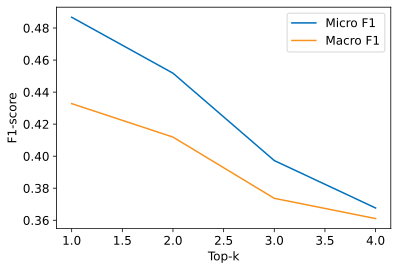

In [37]:
plt.plot(topks, micros, label='Micro F1')
plt.plot(topks, macros, label='Macro F1')
plt.xlabel("Top-k")
plt.ylabel("F1-score")
plt.legend(loc='best')
plt.show()

In [38]:
macros, micros = [], []
thresholds = np.linspace(0.01, 1, 100)
for threshold in thresholds:
    ds_zero_shot = ds_zero_shot.map(get_preds,
                                    fn_kwargs={"threshold": threshold})
    clf_report = get_clf_report(ds_zero_shot)
    micros.append(clf_report["micro avg"]["f1-score"])
    macros.append(clf_report["macro avg"]["f1-score"])

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

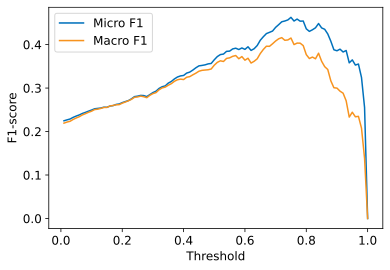

In [39]:
plt.plot(thresholds, micros, label="Micro F1")
plt.plot(thresholds, macros, label="Macro F1")
plt.xlabel("Threshold")
plt.ylabel("F1-score")
plt.legend(loc="best")
plt.show()

In [40]:
best_t, best_micro = thresholds[np.argmax(micros)], np.max(micros)
print(f'ÏµúÏÉÅÏùò ÏûÑÍ≥óÍ∞í (ÎßàÏù¥ÌÅ¨Î°ú): {best_t}, F1-Ï†êÏàò {best_micro:.2f}.')
best_t, best_macro = thresholds[np.argmax(macros)], np.max(macros)
print(f'ÏµúÏÉÅÏùò ÏûÑÍ≥óÍ∞í (ÎßàÌÅ¨Î°ú): {best_t}, F1-Ï†êÏàò {best_macro:.2f}.')

ÏµúÏÉÅÏùò ÏûÑÍ≥óÍ∞í (ÎßàÏù¥ÌÅ¨Î°ú): 0.75, F1-Ï†êÏàò 0.46.
ÏµúÏÉÅÏùò ÏûÑÍ≥óÍ∞í (ÎßàÌÅ¨Î°ú): 0.72, F1-Ï†êÏàò 0.42.


Ïù¥ Î∞©ÏãùÏùò Í≤∞Í≥ºÎäî ÌÉë-1 Í≤∞Í≥ºÎ≥¥Îã§ Îã§ÏÜå ÎÇòÏÅòÏßÄÎßå, Í∑∏ÎûòÌîÑÏóê Ï†ïÎ∞ÄÎèÑ/Ïû¨ÌòÑÏú®Ïùò Ìä∏Î†àÏù¥Îìú Ïò§ÌîÑ(trade-off)Í∞Ä ÌôïÏã§ÌïòÍ≤å ÎÇòÌÉÄÎÇ®. ÏûÑÍ≥óÍ∞íÏùÑ Îß§Ïö∞ ÎÇÆÍ≤å ÏÑ§Ï†ïÌïòÎ©¥ ÏòàÏ∏°Ïù¥ Îß§Ïö∞ ÎßéÏïÑÏ†∏ Ï†ïÎ∞ÄÎèÑÍ∞Ä ÎÇÆÏïÑÏßê

- ÏûÑÍ≥ÑÍ∞íÏùÑ Îß§Ïö∞ ÎÇÆÍ≤å ÏÑ§Ï†ïÌïòÎ©¥ ÏòàÏ∏°Ïù¥ Îß§Ïö∞ ÎßéÏïÑÏ†∏ Ï†ïÎ∞ÄÎèÑÍ∞Ä ÎÇÆÏïÑÏßê
- ÏûÑÍ≥ÑÍ∞íÏùÑ Îß§Ïö∞ ÎÜíÍ≤å ÌïòÎ©¥ ÏòàÏ∏°ÌïòÍ∏∞ Ïñ¥Î†§ÏõåÏ†∏ Ïû¨ÌòÑÏú®Ïù¥ ÎÇÆÏïÑÏßê
- Ïù¥ Í∑∏ÎûòÌîÑÏóêÏÑúÎäî 0.8 Í∑ºÎ∞©Ïùò ÏûÑÍ≥óÍ∞íÏù¥ Ïù¥ Îëò ÏÇ¨Ïù¥Ïùò ÏµúÏ†ÅÍ∞íÏúºÎ°ú Î≥¥ÏûÑ

**ÌÉë-1 Î∞©Î≤ïÏù¥ Îçî ÎÇòÏùÄ Í≤∞Í≥ºÎ•º ÎÉàÏúºÎãà Ïù¥Î•º ÏÇ¨Ïö©Ìï¥ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú Ï†úÎ°úÏÉ∑ Î∂ÑÎ•òÏôÄ ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶àÎ•º ÎπÑÍµê**

In [41]:
ds_zero_shot = ds['test'].map(zero_shot_pipeline)
ds_zero_shot = ds_zero_shot.map(get_preds, fn_kwargs={'topk': 1})
clf_report = get_clf_report(ds_zero_shot)
for train_slice in train_slices:
    macro_scores['Zero Shot'].append(clf_report['macro avg']['f1-score'])
    micro_scores['Zero Shot'].append(clf_report['micro avg']['f1-score'])

Map:   0%|          | 0/111 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Map:   0%|          | 0/111 [00:00<?, ? examples/s]

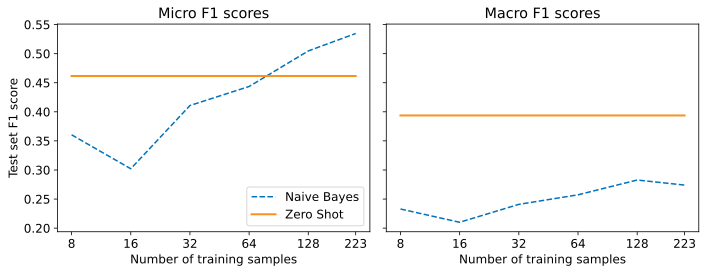

In [42]:
plot_metrics(micro_scores, macro_scores, train_samples, "Zero Shot")

Ï†úÎ°úÏÉ∑ ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ Í∏∞Ï§Ä Î™®Îç∏Í≥º ÎπÑÍµêÌïòÎ©¥ Îã§Ïùå Îëê Í∞ÄÏßÄÎ•º Í¥ÄÏ∞∞Ìï† Ïàò ÏûàÏùå

1. Î†àÏù¥Î∏îÎßÅÎêú ÏÉòÌîåÏù¥ 50Í∞úÎ≥¥Îã§ Îçî Ï†ÅÎã§Î©¥ Ï†úÎ°úÏÉ∑ ÌååÏù¥ÌîÑÎùºÏù∏Ïù¥ Í∏∞Ï§Ä Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÏâΩÍ≤å Ï∂îÏõîÌï®

2. ÏÉòÌîåÏù¥ 50Í∞ú Ïù¥ÏÉÅÏù¥ÎçîÎùºÎèÑ ÎßàÏù¥ÌÅ¨Î°úÏôÄ Îß§ÌÅ¨Î°ú F-1 Ï†êÏàòÎ•º Î™®Îëê Í≥†Î†§ÌïòÎ©¥ Ï†úÎ°úÏÉ∑ ÌååÏù¥ÌîÑÎùºÏù∏Ïù¥ Îçî ÎÇòÏùå
  - ÎßàÏù¥ÌÅ¨Î°ú F1 Ï†êÏàòÏùò Í≤∞Í≥ºÎ•º Î≥¥Î©¥, Í∏∞Ï§Ä Î™®Îç∏Ïù¥ ÎπàÎèÑÍ∞Ä ÎÜíÏùÄ ÌÅ¥ÎûòÏä§ÏóêÏÑú Ïûò ÎèôÏûëÌïòÏßÄÎßå Ï†úÎ°úÏÉ∑ ÌååÏù¥ÌîÑ ÎùºÏù∏ÏùÄ ÌïôÏäµÌï† ÏÉòÌîåÏù¥ ÌïÑÏöîÌïòÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê Í∏∞Ï§Ä Î™®Îç∏Î≥¥Îã§ Îçî Îõ∞Ïñ¥ÎÇ®


ÎßåÏïΩ ÏûêÏã†Ïùò Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ï¢ãÏùÄ Í≤∞Í≥ºÎ•º ÏñªÍ∏∞ ÌûòÎì§Îã§Î©¥ Ï†úÎ°úÏÉ∑ ÌååÏù¥ÌîÑÎùºÏù∏Ïùò ÏÑ±Îä• Ìñ•ÏÉÅÏùÑ ÏúÑÌï¥ Î™á Í∞ÄÏßÄ Î∞©Î≤ïÏùÑ ÏãúÎèÑ Í∞ÄÎä•

- ÌååÏù¥ÌîÑÎùºÏù∏Ïùò ÏûëÎèô Î∞©ÏãùÏùÄ Î†àÏù¥Î∏î Ïù¥Î¶ÑÏóê Îß§Ïö∞ ÎØºÍ∞êÌï®. Ïù¥Î¶ÑÏù¥ Î¨¥ÏùòÎØ∏ÌïòÍ±∞ÎÇò ÌÖçÏä§Ìä∏Ïóê ÏâΩÍ≤å Ïó∞Í≤∞ÎêòÏßÄ ÏïäÏúºÎ©¥ ÌååÏù¥ÌîÑÎùºÏù∏Ïù¥ Ï†úÎåÄÎ°ú ÎèôÏûëÌïòÏßÄ ÏïäÏùå. Ïù¥Î¶ÑÏùÑ Î∞îÍæ∏Í±∞ÎÇò Ïó¨Îü¨ Ïù¥Î¶ÑÏùÑ ÎèôÏãúÏóê ÏÇ¨Ïö©Ìïú Îã§Ïùå ÌõÑÏÜç Îã®Í≥ÑÏóêÏÑú Í≤∞Í≥ºÎ•º ÏßëÍ≥Ñ

- Í∞ÄÏÑ§ÏùÑ Î≥ÄÌòïÌï¥ÎèÑ ÏÑ±Îä•Ïù¥ ÎÜíÏïÑÏßê. Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Í∞ÄÏÑ§ÏùÄ `hypothesis="This is example is about {}"` Ïù¥ÏßÄÎßå ÌååÏù¥ÌîÑÎùºÏù∏Ïóê Îã§Î•∏ ÌÖçÏä§Ìä∏Î•º Ï†ÑÎã¨Ìï¥ÎèÑ Îê®. Î¨∏Ï†úÏóê Îî∞Îùº ÏÑ±Îä•Ïù¥ Ìñ•ÏÉÅÌïòÍ∏∞ÎèÑ Ìï®

## 9.4 Î†àÏù¥Î∏îÏù¥ Ï†ÅÏùÄ Îç∞Ïù¥ÌÑ∞ Îã§Î£®Í∏∞

ÎåÄÎ∂ÄÎ∂ÑÏùò NLP ÌîÑÎ°úÏ†ùÌä∏Îäî Í∑πÏÜåÎüâÏù¥ÎçîÎùºÎèÑ Î†àÏù¥Î∏îÎßÅÎêú ÏÉòÌîåÏù¥ ÏûàÏùå.

Î†àÏù¥Î∏îÏùÄ Í≥†Í∞ùÏù¥ÎÇò Îã§Î•∏ ÌåÄÏóêÏÑú Î∞îÎ°ú ÏñªÍ±∞ÎÇò ÏÉòÌîå Î™á Í∞úÏóê ÏßÅÏ†ë Î†àÏù¥Î∏îÏùÑ ÏûÖÎ†•Ìï®

Ïù¥Ï†Ñ Ï†àÏùò Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÎçîÎùºÎèÑ, Ï†úÎ°úÏÉ∑ Î∞©ÏãùÏù¥ ÏñºÎßàÎÇò Ïûò ÎèôÏûëÌïòÎäîÏßÄ ÌèâÍ∞ÄÌïòÎ†§Î©¥ ÏïΩÍ∞ÑÏùò Î†àÏù¥Î∏îÎ¶¨Îêú ÏÉòÌîåÏù¥ ÌïÑÏöîÌï®. Ïù¥ Ï†àÏóêÏÑú Ï†ÅÏùÄ Î†àÏù¥Î∏î Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©ÌïòÎäî Î∞©Î≤ïÏùÑ ÌôïÏù∏(Îç∞Ïù¥ÌÑ∞ Ï¶ùÏãù Í∏∞Î≤ïÏùÑ ÎπÑÎ°ØÌïú)

### 9.4.1 Îç∞Ïù¥ÌÑ∞ Ï¶ùÏãù

**Îç∞Ïù¥ÌÑ∞ Ï¶ùÏãù(data augmentation)** Í∏∞Î≤ï

- Í∏∞Ï°¥ ÏÉòÌîåÏóêÏÑú ÏÉà ÌõàÎ†® ÏÉòÌîåÏùÑ ÏÉùÏÑ±ÌïòÎäî Î∞©Î≤ï
- Í∞ÑÎã®ÌïòÏßÄÎßå Ìö®Í≥ºÏ†ÅÏúºÎ°ú ÏÑ±Îä•ÏùÑ ÎÜíÏùº Ïàò ÏûàÏùå
- Ïª¥Ìì®ÌÑ∞ ÎπÑÏ†ÑÏóêÏÑú Îç∞Ïù¥ÌÑ∞ Ï¶ùÏãùÏùÄ ÏùºÎ∞òÏ†ÅÏù∏ Ï†ÑÎûµÏù¥ÏßÄÎßå ÌÖçÏä§Ìä∏Îäî Îã®Ïñ¥ÎÇò Î¨∏ÏûêÍ∞Ä Î∞îÎÄåÎ©¥ ÏùòÎØ∏Í∞Ä ÏôÑÏ†ÑÌûà Îã¨ÎùºÏßÄÍ∏∞ ÎïåÎ¨∏Ïóê Îç∞Ïù¥ÌÑ∞ Ï¶ùÏãùÏù¥ Ï°∞Í∏à ÍπåÎã§Î°úÏõÄ
  + ÌïòÏßÄÎßå ÌÖçÏä§Ìä∏Í∞Ä Ïó¨Îü¨ Î¨∏Ïû•ÏúºÎ°ú Íµ¨ÏÑ±ÎêòÏóàÎã§Î©¥ Ïù¥Îü∞ Î≥ÄÌòïÏúºÎ°ú Ï∂îÍ∞ÄÎêòÎäî Ïû°ÏùåÏùÄ ÎåÄÍ∞ú Î†àÏù¥Î∏îÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÏßÄ ÏïäÏùå
  

**Îç∞Ïù¥ÌÑ∞ Ï¶ùÏãù Í∏∞Î≤ï Ï¢ÖÎ•ò**

1. Ïó≠ Î≤àÏó≠(back translation)

  - ÏõêÎ≥∏ Ïñ∏Ïñ¥Î°ú Îêú ÌÖçÏä§Ìä∏Î•º Í∏∞Í≥Ñ Î≤àÏó≠ÏùÑ ÏÇ¨Ïö©Ìï¥ ÌïòÎÇò Ïù¥ÏÉÅÏùò ÌÉÄÍπÉ Ïñ∏Ïñ¥Î°ú Î≤àÏó≠
  - Í∑∏ Îã§Ïùå Ïù¥Î•º ÏõêÎ≥∏ Ïñ∏Ïñ¥Î°ú Îã§Ïãú Î≤àÏó≠
  - Ïó≠Î≤àÏó≠ÏùÄ Îç∞Ïù¥ÌÑ∞Í∞Ä ÎßéÏùÄ Ïñ∏Ïñ¥ ÎòêÎäî ÎèÑÎ©îÏù∏ ÌäπÌôîÎêú Ïñ∏Ïñ¥Í∞Ä Îß§Ïö∞ ÎßéÏßÄ ÏïäÏùÄ ÎßêÎ≠âÏπòÏóêÏÑú Ïûò ÎèôÏûëÌïòÎäî Ìé∏

2. ÌÜ†ÌÅ∞ ÏÑûÍ∏∞(token perturbations)

  - ÌõàÎ†® ÏÑ∏Ìä∏Ïùò Ìïú ÌÖçÏä§Ìä∏ÏóêÏÑú ÎèôÏùòÏñ¥ ÍµêÏ≤¥, Îã®Ïñ¥ Ï∂îÍ∞Ä, ÍµêÌôò, ÏÇ≠Ï†ú Í∞ôÏùÄ Í∞ÑÎã®Ìïú Î≥ÄÌôòÏùÑ ÏûÑÏùòÎ°ú ÏÑ†ÌÉùÌï¥ ÏàòÌñâ

3. Ïù¥ Ïô∏ Î∞©Î≤ï

  - ÏïÑÎûò ÌëúÏôÄ Amit ChaudharyÏùò Î∏îÎ°úÍ∑∏ Ìè¨Ïä§Ìä∏ "A Visual Survey of Data Augmentation in NLP" Ï∞∏Ï°∞ (https://amitness.com/2020/05/data-augmentation-for-nlp/)

**[Ìëú9-2]** ÌÖçÏä§Ìä∏ÏóêÏÑú ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî Ïó¨Îü¨Í∞ÄÏßÄ Îç∞Ïù¥ÌÑ∞ Ï¶ùÏãù Í∏∞Î≤ï

|Îç∞Ïù¥ÌÑ∞ Ï¶ùÏãù | Î¨∏Ïû• |
|:----------|:-----|
|ÏóÜÏùå       | Even if you defeat me Megatron, others will rise to defeat your tyarnny |
|ÎèôÏùòÏñ¥ ÍµêÏ≤¥| Even if you kill me Megatron, others will prove to defeat your tyranny |
|Î¨¥ÏûëÏúÑ Ï∂îÍ∞Ä| Even if you defeat me Megatron, others humanity will rise to defeat your tyranny |
|Î¨¥ÏûëÏúÑ ÍµêÏ≤¥| You even if defeat me Megatron, others will rise defeat to tyranny your |
|Î¨¥ÏûëÏúÑ ÏÇ≠Ï†ú| Even if you me Megatron, others to defeat tyranny |
|Ïó≠ Î≤àÏó≠(ÎèÖÏùºÏñ¥)| Even if you defeat me, others will rise up to defeat your tyranny |

In [43]:
# ÎèôÏùòÏñ¥ ÍµêÏ≤¥Î•º ÏúÑÌï¥ NlpAugÏùò ContextualWordEmbsAug ÌÅ¥ÎûòÏä§Î°ú
# DistilBERTÏùò Î¨∏Îß• Îã®Ïñ¥ ÏûÑÎ≤†Îî©ÏùÑ ÏÇ¨Ïö©

from transformers import set_seed
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

set_seed(3)
text = "Even if you defeat me Megatron, others will rise to defeat your tyranny"
augs = {}
augs["synonym_replace"] = naw.SynonymAug(aug_src='wordnet')
augs["random_insert"] = naw.ContextualWordEmbsAug(model_path="distilbert-base-uncased",
                                device="cpu", action="insert", aug_max=1)
augs["random_swap"] = naw.RandomWordAug(action="swap")
augs["random_delete"] = naw.RandomWordAug()
augs["bt_en_de"] = naw.BackTranslationAug(
    from_model_name='facebook/wmt19-en-de',
    to_model_name='facebook/wmt19-de-en'
)
for k,v in augs.items():
    print(f"ÏõêÎ≥∏ ÌÖçÏä§Ìä∏: {text}")
    print(f"{k}: {v.augment(text)}")
    print("")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/260 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

vocab-src.json:   0%|          | 0.00/849k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/315k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

vocab-src.json:   0%|          | 0.00/849k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/315k [00:00<?, ?B/s]

ÏõêÎ≥∏ ÌÖçÏä§Ìä∏: Even if you defeat me Megatron, others will rise to defeat your tyranny
synonym_replace: ['Even if you vote down me Megatron, others will turn out to
defeat your tyranny']

ÏõêÎ≥∏ ÌÖçÏä§Ìä∏: Even if you defeat me Megatron, others will rise to defeat your tyranny
random_insert: ['even if you defeat me megatron, others will rise to finally
defeat your tyranny']

ÏõêÎ≥∏ ÌÖçÏä§Ìä∏: Even if you defeat me Megatron, others will rise to defeat your tyranny
random_swap: ['Even if you defeat Megatron me, others to will rise defeat your
tyranny']

ÏõêÎ≥∏ ÌÖçÏä§Ìä∏: Even if you defeat me Megatron, others will rise to defeat your tyranny
random_delete: ['Even if me Megatron, will rise to tyranny']

ÏõêÎ≥∏ ÌÖçÏä§Ìä∏: Even if you defeat me Megatron, others will rise to defeat your tyranny
bt_en_de: ['Even if you defeat me, others will rise up to defeat your tyranny']



In [44]:
from transformers import set_seed
import nlpaug.augmenter.word as naw

set_seed(3)
aug = naw.ContextualWordEmbsAug(model_path="distilbert-base-uncased",
                                device="cpu", action="substitute")

text = "Transformers are the most popular toys"
print(f"ÏõêÎ≥∏ ÌÖçÏä§Ìä∏: {text}")
print(f"Ï¶ùÏãùÎêú ÌÖçÏä§Ìä∏: {aug.augment(text)}")

ÏõêÎ≥∏ ÌÖçÏä§Ìä∏: Transformers are the most popular toys
Ï¶ùÏãùÎêú ÌÖçÏä§Ìä∏: ['transformers ‚Äî the most coveted toys']


In [45]:
def augment_text(batch, transformations_per_example=1):
    text_aug, label_ids = [], []
    for text, labels in zip(batch["text"], batch["label_ids"]):
        text_aug += [text]
        label_ids += [labels]
        for _ in range(transformations_per_example):
            text_aug += aug.augment(text)
            label_ids += [labels]
    return {"text": text_aug, "label_ids": label_ids}

ÌÖçÏä§Ìä∏ Ï¶ùÏãùÏùÑ ÏúÑÌïú augment_text Ìï®Ïàò ÏÉùÏÑ±

- Ïù¥ Ìï®ÏàòÎ•º map() Î©îÏÑúÎìúÏóê Ï†ÑÎã¨Ìï† Îïå transformations_per_example Îß§Í∞úÎ≥ÄÏàòÏóê ÏÉàÎ°ú ÏÉùÏÑ±Ìï† ÏÉòÌîå ÏàòÎ•º ÏßÄÏ†ïÌï† Ïàò ÏûàÏùå
- Ïù¥ Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ ÌõàÎ†® Ïä¨ÎùºÏù¥Ïä§Î•º ÏÑ†ÌÉùÌïú ÌõÑ ÏΩîÎìú Ìïú Ï§ÑÎßå Ï∂îÍ∞ÄÌïòÏó¨ ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à Î∂ÑÎ•òÍ∏∞Î•º ÌõàÎ†®Ìï®

In [46]:
for train_slice in train_slices:
    # ÌõàÎ†® Ïä¨ÎùºÏù¥Ïä§ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º Ï§ÄÎπÑÌï©ÎãàÎã§
    ds_train_sample = ds["train"].select(train_slice)
    # Ï¶ùÏãù Í≤∞Í≥ºÎ•º ÌéºÏ≥êÏÑú Î†àÏù¥Î∏îÏóê Ï†ïÎ†¨Ìï©ÎãàÎã§!
    ds_train_aug = (ds_train_sample.map(
        augment_text, batched=True, remove_columns=ds_train_sample.column_names)
                    .shuffle(seed=42))
    y_train = np.array(ds_train_aug["label_ids"])
    y_test = np.array(ds["test"]["label_ids"])
    # Í∞ÑÎã®Ìïú CountVectorizerÎ•º ÏÇ¨Ïö©Ìï¥ ÌÖçÏä§Ìä∏Î•º ÌÜ†ÌÅ∞ Ïπ¥Ïö¥Ìä∏Î°ú Ïù∏ÏΩîÎî©Ìï©ÎãàÎã§
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(ds_train_aug["text"])
    X_test_counts = count_vect.transform(ds["test"]["text"])
    # Î™®Îç∏ÏùÑ ÎßåÎì§Í≥† ÌõàÎ†®Ìï©ÎãàÎã§!
    classifier = BinaryRelevance(classifier=MultinomialNB())
    classifier.fit(X_train_counts, y_train)
    # ÏòàÏ∏°ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† ÌèâÍ∞ÄÌï©ÎãàÎã§
    y_pred_test = classifier.predict(X_test_counts)
    clf_report = classification_report(
        y_test, y_pred_test, target_names=mlb.classes_, zero_division=0,
        output_dict=True)
    # ÌèâÍ∞Ä Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï©ÎãàÎã§
    macro_scores["Naive Bayes + Aug"].append(clf_report["macro avg"]["f1-score"])
    micro_scores["Naive Bayes + Aug"].append(clf_report["micro avg"]["f1-score"])

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

Map:   0%|          | 0/19 [00:00<?, ? examples/s]

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

Map:   0%|          | 0/68 [00:00<?, ? examples/s]

Map:   0%|          | 0/134 [00:00<?, ? examples/s]

Map:   0%|          | 0/223 [00:00<?, ? examples/s]

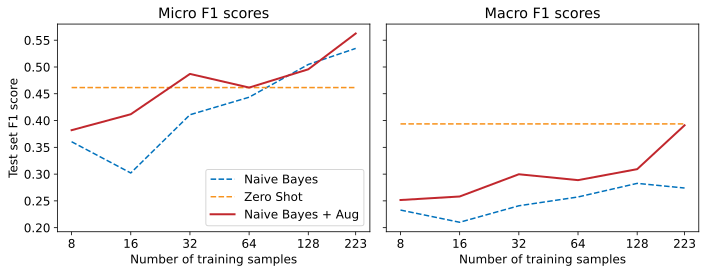

In [47]:
plot_metrics(micro_scores, macro_scores, train_samples, "Naive Bayes + Aug")

Í∑∏Î¶ºÏùÑ Î≥¥Î©¥ ÏÜåÎüâÏùò Îç∞Ïù¥ÌÑ∞ Ï¶ùÏãùÏúºÎ°ú ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à Î∂ÑÎ•òÍ∏∞Ïùò F1 Ï†êÏàòÍ∞Ä ÏïΩ 5Ìè¨Ïù∏Ìä∏ ÏÉÅÏäπÌï®

- ÏïΩ 170Í∞ú ÌõàÎ†® ÏÉòÌîåÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ Îß§ÌÅ¨Î°ú Ï†êÏàòÏóêÏÑú Ï†úÎ°úÏÉ∑ ÌååÏù¥ÌîÑÎùºÏù∏Ïùò ÏÑ±Îä•ÏùÑ Ï∂îÏõîÌï®


Îã§ÏùåÏúºÎ°ú ÎåÄÍ∑úÎ™® Ïñ∏Ïñ¥ Î™®Îç∏Ïùò ÏûÑÎ≤†Îî©ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Î∞©Î≤ïÏùÑ ÌôïÏù∏

### 9.4.2 ÏûÑÎ≤†Îî©ÏùÑ Î£©ÏóÖ ÌÖåÏù¥Î∏îÎ°ú ÏÇ¨Ïö©ÌïòÍ∏∞

**Ïù¥ Ï†àÏùò ÏΩîÎìúÎäî [09_few_to_no_labels_with_faiss.ipynb](https://github.com/rickiepark/nlp-with-transformers/blob/main/09_few_to_no_labels_with_faiss.ipynb) ÎÖ∏Ìä∏Î∂ÅÏóê ÏûàÏäµÎãàÎã§**

<img alt="nearest-neighbours" caption="An illustration of nearest neighbor embedding lookup" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter09_nearest-neighbours.png?raw=1" id="nearest-neighbours"/>

In [48]:
# ÍπÉÌóàÎ∏åÏóêÏÑú 09_few_to_no_labels_with_faiss.ipynbÏùò Í≤∞Í≥ºÎ•º Îã§Ïö¥Î°úÎìúÌïòÏó¨ Ï†êÏàò ÎîïÏÖîÎÑàÎ¶¨Ïóê Ï∂îÍ∞ÄÌï©ÎãàÎã§.
!wget https://bit.ly/3QZRsHS -O 09_results_of_faiss.gz

import joblib

embedding_results = joblib.load('09_results_of_faiss.gz')
macro_scores["Embedding"] = embedding_results["macro"]["Embedding"]
micro_scores["Embedding"] = embedding_results["micro"]["Embedding"]

--2024-02-03 10:17:34--  https://bit.ly/3QZRsHS
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/nlp-with-transformers/raw/main/09_results_of_faiss.gz [following]
--2024-02-03 10:17:34--  https://github.com/rickiepark/nlp-with-transformers/raw/main/09_results_of_faiss.gz
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/nlp-with-transformers/main/09_results_of_faiss.gz [following]
--2024-02-03 10:17:34--  https://raw.githubusercontent.com/rickiepark/nlp-with-transformers/main/09_results_of_faiss.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.git

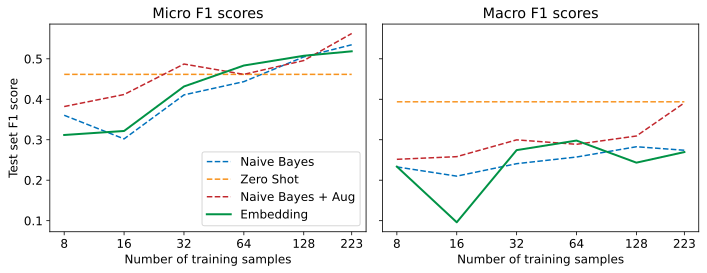

In [49]:
plot_metrics(micro_scores, macro_scores, train_samples, "Embedding")

ÏûÑÎ≤†Îî© Î£©ÏóÖÏùÄ ÌïôÏäµ Í∞ÄÎä•Ìïú ÌååÎùºÎØ∏ÌÑ∞ kÏôÄ mÏùÑ Í∞ÄÏßÄÎ©¥ÏÑú ÎßàÏù¥ÌÅ¨Î°ú Ï†êÏàòÏóêÏÑú Ïù¥Ï†Ñ Î∞©Î≤ïÎì§Ïóê ÎπÑÌï¥ Í≤ΩÏüÅÎ†•Ïù¥ ÏûàÏùå
- ÌïòÏßÄÎßå Îß§ÌÅ¨Î°ú Ï†êÏàòÏóêÏÑúÎäî Ï°∞Í∏à ÎÇòÏÅú ÏÑ±Îä•ÏùÑ Î≥¥ÏûÑ
- Ïù¥Îü∞ Í≤∞Í≥ºÎäî Ï°∞Ïã¨Ìï¥ÏÑú Î∞õÏïÑÎì§Ïó¨Ïïº Ìï®. ÎèÑÎ©îÏù∏Ïóê Îî∞Îùº Ïûò ÎèôÏûëÌïòÎäî Î∞©Î≤ïÏù¥ ÌÅ¨Í≤å Îã§Î¶Ñ

Ïù¥ Ï†úÎ°úÏÉ∑ ÌååÏù¥ÌîÑÎùºÏù∏Ïùò ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Îäî Ïó¨Í∏∞ÏÑú ÏÇ¨Ïö©Ìïú ÍπÉÌóàÎ∏å Ïù¥Ïäà Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º ÎßéÏù¥ Îã§Î¶Ñ. ÍπÉÌóàÎ∏å Ïù¥ÏäàÏóêÎäî Î™®Îç∏Ïù¥ Ïù¥Ï†ÑÏóê ÎßåÎÇòÎ≥∏ Ï†Å ÏóÜÎäî ÎßéÏùÄ ÏΩîÎìúÍ∞Ä Ìè¨Ìï®Îê®
- Ïù¥ ÌååÏù¥ÌîÑÎùºÏù∏ÏùÄ Î¶¨Î∑∞ Í∞êÏÑ± Î∂ÑÏÑùÍ∞ôÏùÄ Îçî ÏùºÎ∞òÏ†ÅÏù∏ ÏûëÏóÖÏóêÏÑú Ìõ®Ïî¨ Îçî Ïûò ÎèôÏûëÌï®
- ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú ÏûÑÎ≤†Îî©Ïùò ÌíàÏßàÏùÄ Î™®Îç∏Í≥º ÌõàÎ†®ÌïòÎäî Îç∞Ïù¥ÌÑ∞Ïóê Îî∞Îùº Îã¨ÎùºÏßê
  + Îã§Î•∏ Î™®Îç∏ÏùÑ ÌÖåÏä§Ìä∏ÌïòÎ†§Î©¥ Î™®Îç∏ Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏ Ïù¥Î¶ÑÎßå Î∞îÍæ∏Î©¥ ÎêòÎØÄÎ°ú, ÌèâÍ∞Ä ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ Ï§ÄÎπÑÌïòÍ≥† ÎÇòÎ©¥ Ïó¨Îü¨ Î™®Îç∏ÏùÑ Îπ†Î•¥Í≤å ÏãúÌóòÌï† Ïàò ÏûàÏùå

### ÏÇ¨Ïù¥ÎìúÎ∞î: FAISSÎ•º ÏÇ¨Ïö©Ìïú Ìö®Ïú®Ï†ÅÏù∏ Ïú†ÏÇ¨ÎèÑ Í≤ÄÏÉâ

- FAISS ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò ÏûëÎèô Î∞©ÏãùÍ≥º ML ÎèÑÍµ¨ÏÉÅÏûêÏóêÏÑú Ïù¥ ÎùºÏù¥Î∏åÎü¨Î¶¨Í∞Ä Í∞ïÎ†•Ìïú Ïù¥Ïú†Î•º Í∞ÑÎûµÌïòÍ≤å ÏÑ§Î™Ö

Ïö∞Î¶¨Îäî ÏúÑÌÇ§ÌîºÎîîÏïÑÏôÄ Í∞ôÏùÄ ÎåÄÍ∑úÎ™® Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ÎÇò Íµ¨Í∏Ä Í∞ôÏùÄ Í≤ÄÏÉâ ÏóîÏßÑÏúºÎ°ú ÏõπÏóêÏÑú Îπ†Î•∏ ÌÖçÏä§Ìä∏ ÏøºÎ¶¨Î•º ÏàòÌñâÌïòÎäîÎç∞ ÏùµÏàôÌï®
- Ïù¥ ÏÑ±Îä•ÏùÄ ÌÖçÏä§Ìä∏ÏóêÏÑú ÏûÑÎ≤†Îî©ÏúºÎ°ú Î∞îÍøÄ ÎïåÎèÑ Ïú†ÏßÄÌïòÍ≥† Ïã∂ÏßÄÎßå ÌÖçÏä§Ìä∏ ÏøºÎ¶¨Ïùò ÏÜçÎèÑÎ•º ÎÜíÏù¥Îäî Î∞©Î≤ïÏù¥ ÏûÑÎ≤†Îî©ÏóêÎäî Ï†ÅÏö©ÎêòÏßÄ ÏïäÏùå

ÌÖçÏä§Ìä∏ Í≤ÄÏÉâÏùò ÏÜçÎèÑÎ•º ÎÜíÏù¥Í∏∞ ÏúÑÌï¥ÏÑúÎäî ÏùºÎ∞òÏ†ÅÏúºÎ°ú Îã®Ïñ¥Î•º Î¨∏ÏÑúÏóê Îß§ÌïëÌïú Ïó≠ Ïù∏Îç±Ïä§(inverted index)Î•º ÎßåÎì¶
- Ïó≠ Ïù∏Îç±Ïä§Îäî Ï±Ö ÎÅùÏóê ÏûàÎäî Ï∞æÏïÑÎ≥¥Í∏∞ÏôÄ ÎπÑÏä∑ÌïòÍ≤å ÎèôÏûëÌï®
  - Ï¶â, Í∞Å Îã®Ïñ¥Îäî Îã®Ïñ¥Í∞Ä Îì±Ïû•Ìïú ÌéòÏù¥ÏßÄ(Ïù¥ Í≤ΩÏö∞, Î¨∏ÏÑú)Ïóê Îß§ÌïëÎê®
  - ÎÇòÏ§ëÏóê ÏøºÎ¶¨Î•º Ïã§ÌñâÌïòÎ©¥ Í≤ÄÏÉâ Îã®Ïñ¥Í∞Ä Îì±Ïû•Ìïú Î¨∏ÏÑúÎ•º Îπ†Î•¥Í≤å Ï∞æÏùå
- Ïù¥ Î∞©ÏãùÏùÄ Îã®Ïñ¥ÏôÄ Í∞ôÏùÄ Ïù¥ÏÇ∞Ï†ÅÏù∏ Í∞ùÏ≤¥ÏóêÏÑú Ïûò ÎèôÏûëÌï®

ÌïòÏßÄÎßå Î≤°ÌÑ∞ÏôÄ Í∞ôÏùÄ Ïó∞ÏÜçÏ†ÅÏù∏ Í∞ùÏ≤¥ÏóêÏÑúÎäî Ïûò ÎßûÏßÄ ÏïäÏùå. Í∞Å Î¨∏ÏÑúÏùò Î≤°ÌÑ∞Îäî Í≥†Ïú†Ìï† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏïÑ Ïù∏Îç±Ïä§Í∞Ä ÏÉàÎ°úÏö¥ Î≤°ÌÑ∞ÏôÄ Ï†àÎåÄ ÏùºÏπòÌïòÏßÄ ÏïäÏùå. Îî∞ÎùºÏÑú Ï†ïÌôïÌûà ÏùºÏπòÌïòÎäî Ìï≠Î™© ÎåÄÏã† Í∞ÄÍπùÍ±∞ÎÇò ÎπÑÏä∑Ìïú Ìï≠Î™©ÏùÑ Ï∞æÏïÑÏïº Ìï®

Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ÏóêÏÑú ÏøºÎ¶¨ Î≤°ÌÑ∞ÏôÄ Í∞ÄÏû• ÎπÑÏä∑Ìïú Î≤°ÌÑ∞Î•º Ï∞æÍ≥† Ïã∂ÏùÑ ÎïåÎäî Ïù¥Î°†Ï†ÅÏúºÎ°ú ÏøºÎ¶¨ Î≤°ÌÑ∞Î•º Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§Ïóê ÏûàÎäî nÍ∞úÏùò Î≤°ÌÑ∞ÏôÄ Î™®Îëê ÎπÑÍµêÌï¥Ïïº Ìï®. ÏûëÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑúÎäî Î¨∏Ï†úÍ∞Ä ÏïàÎêòÏßÄÎßå, Ïù¥Î•º ÏàòÏ≤ú ÎòêÎäî ÏàòÎ∞±Îßå Í∞ú Ìï≠Î™©ÏúºÎ°ú ÌôïÏû•ÌïúÎã§Î©¥ ÏøºÎ¶¨Í∞Ä Ï≤òÎ¶¨ÎêòÎäî ÎèôÏïà Ïû†Ïãú Í∏∞Îã§Î†§Ïïº Ìï®

**FAISS**Îäî Î™áÍ∞ÄÏßÄ Ìä∏Î¶≠ÏúºÎ°ú Ïù¥ Î¨∏Ï†úÎ•º Ìï¥Í≤∞Ìï®
- Ï£ºÏöî Í∞úÎÖêÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î∂ÑÌï†ÌïòÎäî Í≤É
- ÏøºÎ¶¨ Î≤°ÌÑ∞Î•º Îç∞Ïù¥ÌÑ∞ÏÖã ÏùºÎ∂ÄÏôÄ ÎπÑÍµêÌïòÎ©¥ Ï≤òÎ¶¨ ÏÜçÎèÑÍ∞Ä ÌÅ¨Í≤å ÎÜíÏïÑÏßê.
- Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ Î¨¥ÏûëÏúÑÎ°ú ÎÇòÎâòÎ©¥ K-means clusteringÏùÑ Ï†ÅÏö©ÌïòÏó¨ Ïú†ÏÇ¨ÎèÑÏóê Îî∞Îùº ÏûÑÎ≤†Îî©ÏùÑ Í∑∏Î£πÏúºÎ°ú Î¨∂Ïùå
  + Í∞Å Í∑∏Î£πÏóê ÏÜçÌïú Î≤°ÌÑ∞Î•º Î™®Îëê ÌèâÍ∑†Ìï¥ ÏÑºÌä∏Î°úÏù¥Îìú(centroid) Î≤°ÌÑ∞Î•º ÏñªÏùå (**[Í∑∏Î¶º 9-4]**)



<img alt="faiss-index" caption="The structure of a FAISS index: the gray points represent data points added to the index, the bold black points are the cluster centers found via k-means clustering, and the colored areas represent the regions belonging to a cluster center" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter09_faiss-index.png?raw=1" id="faiss-index"/>

**[Í∑∏Î¶º 9-4]** FAISS Ïù∏Îç±Ïä§Ïùò Íµ¨Ï°∞

- ÌöåÏÉâ Ï†êÏùÄ Ïù∏Îç±Ïä§Ïóê Ï∂îÍ∞ÄÎêú Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏
- Í≤ÄÏùÄ ÎèôÍ∑∏ÎùºÎØ∏Îäî k-ÌèâÍ∑† ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏúºÎ°ú Ï∞æÏùÄ ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏÑºÌä∏Î°úÏù¥Îìú
- ÏùåÏòÅÏúºÎ°ú Íµ¨Î∂ÑÎêú ÏßÄÏó≠ÏùÄ ÌïòÎÇòÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï§ëÏã¨Ïóê ÏÜçÌïú ÏòÅÏó≠


Ïù¥Î†áÍ≤å Í∑∏Î£πÌïëÎêòÎ©¥ nÍ∞úÏùò Î≤°ÌÑ∞ÏóêÏÑú Í≤ÄÏÉâÌïòÍ∏∞Í∞Ä Ìõ®Ïî¨ Ïâ¨Ïñ¥Ïßê.

1. Î®ºÏ†Ä kÍ∞úÏùò ÏÑºÌä∏Î°úÏù¥ÎìúÏóêÏÑú ÏøºÎ¶¨ÏôÄ Í∞ÄÏû• ÎπÑÏä∑Ìïú Í≤ÉÏùÑ Ï∞æÏùå(kÌöå ÎπÑÍµê)

2. Í∑∏ Îã§Ïùå Ìï¥Îãπ Í∑∏Î£π ÏïàÏóêÏÑú Í≤ÄÏÉâÏùÑ Ìï®($n/k$Í∞ú ÏõêÏÜå ÎπÑÍµê)

3. Í∑∏Îü¨Î©¥ ÎπÑÍµê ÌöüÏàòÍ∞Ä nÏóêÏÑú $k + n/k$ ÏúºÎ°ú Ï§ÑÏñ¥Îì¨

  - ÏµúÏÜåÍ∞íÏùÄ $k = \sqrt{n}$


Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÌï†Î°ú ÏøºÎ¶¨ ÏÜçÎèÑÎ•º ÎÜíÏù¥Îäî Í≤É Ïô∏ÏóêÎèÑ FAISSÏùò ÏÜçÎèÑ Ìñ•ÏÉÅÏùÑ ÎÜíÏù¥Îäî Î∞©Î≤ïÏúºÎ°ú GPUÎ•º ÌôúÏö©Ìï† Ïàò ÏûàÏùå

- FAISSÎ•º ÏÇ¨Ïö©ÌïòÎäî Í∞ÄÏû• ÌÅ∞ ÌîÑÎ°úÏ†ùÌä∏ ÏÜåÍ∞ú
  + ÌéòÏù¥Ïä§Î∂Å CCMatrix (https://github.com/facebookresearch/faiss/wiki/Guidelines-to-choose-an-index)

    * Îã§Íµ≠Ïñ¥ ÏûÑÎ≤†Îî©ÏùÑ ÏÇ¨Ïö©Ìï¥ Îã§Î•∏ Ïñ∏Ïñ¥ÏóêÏÑú ÎèôÏùºÌïú Î¨∏Ïû•ÏùÑ Ï∞æÏùå
    * Ïù¥ Í±∞ÎåÄÌïú ÎßêÎ≠âÏπòÎäî 100Í∞ú Ïñ∏Ïñ¥Î•º ÏßÅÏ†ë Î≤àÏó≠ÌïòÎäî ÎåÄÍ∑úÎ™® Í∏∞Í≥Ñ Î≤àÏó≠ Î™®Îç∏Ïù∏ M2M100ÏùÑ ÌõàÎ†®ÌïòÎäîÎç∞ ÏÇ¨Ïö©Îê®
      
      +  https://huggingface.co/facebook/m2m100_1.2B

### ÏÇ¨Ïù¥ÎìúÎ∞î ÎÅù

### 9.4.3 Í∏∞Î≥∏ Ìä∏ÎûúÏä§Ìè¨Î®∏ ÎØ∏ÏÑ∏ ÌäúÎãùÌïòÍ∏∞

Î†àÏù¥Î∏îÎßÅÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎã§Î©¥ ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú Ìä∏ÎûúÏä§Ìè¨Î®∏ Î™®Îç∏Ïùò ÎØ∏ÏÑ∏ ÌäúÎãùÎèÑ Í∞ÄÎä•Ìï®
Í∏∞Î≥∏ BERT Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏Î°ú ÏãúÏûëÌï¥ Ïñ∏Ïñ¥ Î™®Îç∏Ïùò ÎØ∏ÏÑ∏ ÌäúÎãùÏù¥ ÏÑ±Îä•Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•ÏùÑ ÏÇ¥Ìé¥ Î¥Ñ

**TIP** ÎßéÏùÄ Ïï†ÌîåÎ¶¨ÏºÄÏù¥ÏÖòÏóêÏÑú ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú BERT Í∞ôÏùÄ Î™®Îç∏Î°ú ÏãúÏûëÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏùå. ÌïòÏßÄÎßå ÎßêÎ≠âÏπòÏùò ÎèÑÎ©îÏù∏Ïù¥ ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú ÎßêÎ≠âÏπò(ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏúÑÌÇ§ÌîºÎîîÏïÑ)ÏôÄ ÌÅ¨Í≤å Îã§Î•¥Îã§Î©¥ ÌóàÍπÖÌéòÏù¥Ïä§ ÌóàÎ∏åÏóê ÏûàÎäî ÎßéÏùÄ Î™®Îç∏ÏùÑ Ï∞æÏïÑÎ¥êÏïº Ìï®. ÎàÑÍµ∞Í∞ÄÍ∞Ä Ïù¥ÎØ∏ Ìï¥Îãπ ÎèÑÎ©îÏù∏ÏóêÏÑú Î™®Îç∏ÏùÑ ÏÇ¨Ï†Ñ ÌõàÎ†®ÌñàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏùå!

In [50]:
# 1. ÏÇ¨Ï†Ñ ÌõàÎ†® ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎìú ÌõÑ Îç∞Ïù¥ÌÑ∞ÏÖã ÌÜ†ÌÅ∞Ìôî
#    + ÌõàÎ†®Í≥º ÌèâÍ∞ÄÏóê ÌïÑÏöî ÏóÜÎäî Ïó¥ ÏÇ≠Ï†ú

import torch
from transformers import (AutoTokenizer, AutoConfig,
                          AutoModelForSequenceClassification)

model_ckpt = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

def tokenize(batch):
    return tokenizer(batch["text"], truncation=True, max_length=128)
ds_enc = ds.map(tokenize, batched=True)
ds_enc = ds_enc.remove_columns(['labels', 'text'])

Map:   0%|          | 0/223 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/111 [00:00<?, ? examples/s]

Map:   0%|          | 0/9303 [00:00<?, ? examples/s]

Îã§Ï§ë Î†àÏù¥Î∏î ÏÜêÏã§ Ìï®ÏàòÎäî Ïù¥ÏÇ∞Ï†ÅÏù∏ Î†àÏù¥Î∏î ÎåÄÏã† ÌÅ¥ÎûòÏä§ ÌôïÎ•†ÎèÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Ïã§Ïàò ÌÉÄÏûÖÏùò Î†àÏù¥Î∏îÏùÑ Í∏∞ÎåÄÌï®

Îî∞ÎùºÏÑú label_ids Ïó¥Ïùò ÌÉÄÏûÖÏùÑ Î∞îÍøîÏïº Ìï®

Ïó¥ ÏõêÏÜåÏùò Ìè¨Îß∑ÏùÑ Î∞îÍæ∏Î©¥ Ïï†Î°úÏö∞Ïùò ÌÉÄÏûÖ Ìè¨Îß∑(typed format)ÏóêÏÑú Ïûò ÎèôÏûëÌïòÏßÄ ÏïäÏúºÎØÄÎ°ú Ï°∞Í∏à ÎèåÏïÑÍ∞ÄÏïº Ìï®

1. Î®ºÏ†Ä Î†àÏù¥Î∏îÎ°ú ÏÉà Ïó¥ÏùÑ ÎßåÎì¶
2. Ïù¥ Ïó¥Ïùò Ìè¨Îß∑ÏùÄ Ï≤´ Î≤àÏß∏ ÏõêÏÜåÎ°ú Ï∂îÎ°†
3. Í∑∏ Îã§Ïùå ÏõêÎ≥∏ Ïó¥ÏùÑ ÏÇ≠Ï†úÌïòÍ≥† ÏÉà Ïó¥Ïùò Ïù¥Î¶ÑÏùÑ Î∞îÍøî ÏõêÎ≥∏ Ïó¥ÏùÑ ÎåÄÏ≤¥Ìï®

In [51]:
ds_enc.set_format("torch")
ds_enc = ds_enc.map(lambda x: {"label_ids_f": x["label_ids"].to(torch.float)},
                    remove_columns=["label_ids"])
ds_enc = ds_enc.rename_column("label_ids_f", "label_ids")

Map:   0%|          | 0/223 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/111 [00:00<?, ? examples/s]

Map:   0%|          | 0/9303 [00:00<?, ? examples/s]

ÌÅ¨Í∏∞Í∞Ä ÏûëÍ∏∞ ÎïåÎ¨∏Ïóê ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Í∏àÏÑ∏ Í≥ºÎåÄ Ï†ÅÌï©Îê† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå. Îî∞ÎùºÏÑú load_best_model_at_end = TrueÎ°ú ÏÑ§Ï†ïÌï¥ÏÑú ÎßàÏù¥ÌÅ¨Î°ú F-1 Ï†êÏàòÎ•º Í∏∞Î∞òÏúºÎ°ú ÏµúÏÑ†Ïùò Î™®Îç∏ÏùÑ ÏÑ†ÌÉùÌï®

In [52]:
from transformers import Trainer, TrainingArguments

training_args_fine_tune = TrainingArguments(
    output_dir="./results",
    num_train_epochs=20,
    learning_rate=3e-5,
    lr_scheduler_type='constant',
    per_device_train_batch_size=4,
    per_device_eval_batch_size=32,
    weight_decay=0.0,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model='micro f1',
    save_total_limit=1, log_level='error')

ÏµúÏÉÅÏùò Î™®Îç∏ÏùÑ ÏÑ†ÌÉùÌïòÎ†§Î©¥ F-1 Ï†êÏàòÍ∞Ä ÌïÑÏöîÌï®.

Îî∞ÎùºÏÑú ÌèâÍ∞Ä Îã®Í≥ÑÏóêÏÑú Ïù¥Î•º Í≥ÑÏÇ∞Ìï®
Î™®Îç∏Ïù¥ Î°úÏßìÏùÑ Î∞òÌôòÌïòÎØÄÎ°ú Î®ºÏ†Ä ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®ÏàòÎ°ú ÏòàÏ∏°ÏùÑ Ï†ïÍ∑úÌôîÌïòÍ≥†, Í∑∏ Îã§Ïùå Í∞ÑÎã®Ìïú ÏûÑÍ≥óÍ∞íÏúºÎ°ú Ïù¥Î•º Ïù¥ÏßÑÌôîÌï®

Í∑∏ ÌõÑ Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏Î•º ÏÇ¨Ïö©Ìï¥ Í¥ÄÏã¨ ÎåÄÏÉÅ Ï†êÏàòÎ•º Î∞òÌôòÌï®


In [53]:
from scipy.special import expit as sigmoid

def compute_metrics(pred):
    y_true = pred.label_ids
    y_pred = sigmoid(pred.predictions)
    y_pred = (y_pred>0.5).astype(float)

    clf_dict = classification_report(y_true, y_pred, target_names=all_labels,
                                     zero_division=0, output_dict=True)
    return {"micro f1": clf_dict["micro avg"]["f1-score"],
            "macro f1": clf_dict["macro avg"]["f1-score"]}

Ïù¥Ï†ú ÌõàÎ†® Ï§ÄÎπÑÍ∞Ä ÏôÑÎ£åÎê®

ÌõàÎ†® ÏÑ∏Ìä∏ Ïä¨ÎùºÏù¥Ïä§ÎßàÎã§ Ï≤òÏùåÎ∂ÄÌÑ∞ Î∂ÑÎ•òÍ∏∞Î•º ÌõàÎ†®ÌïòÍ≥†, ÌõàÎ†® Î£®ÌîÑ ÎÅùÏóêÏÑú ÏµúÏÉÅÏùò Î™®Îç∏ÏùÑ Î°úÎìúÌïòÍ≥†, ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Ïùò Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï®

In [54]:
config = AutoConfig.from_pretrained(model_ckpt)
config.num_labels = len(all_labels)
config.problem_type = "multi_label_classification"

In [55]:
for train_slice in train_slices:
    model = AutoModelForSequenceClassification.from_pretrained(model_ckpt,
                                                               config=config)
    trainer = Trainer(
        model=model, tokenizer=tokenizer,
        args=training_args_fine_tune,
        compute_metrics=compute_metrics,
        train_dataset=ds_enc["train"].select(train_slice),
        eval_dataset=ds_enc["valid"],)

    trainer.train()
    pred = trainer.predict(ds_enc["test"])
    metrics = compute_metrics(pred)
    macro_scores["Fine-tune (vanilla)"].append(metrics["macro f1"])
    micro_scores["Fine-tune (vanilla)"].append(metrics["micro f1"])

{'loss': 0.6565, 'learning_rate': 3e-05, 'epoch': 1.0}
{'eval_loss': 0.5977675914764404, 'eval_micro f1': 0.15023474178403753, 'eval_macro f1': 0.031189083820662766, 'eval_runtime': 0.2519, 'eval_samples_per_second': 420.769, 'eval_steps_per_second': 15.878, 'epoch': 1.0}
{'loss': 0.5732, 'learning_rate': 3e-05, 'epoch': 2.0}
{'eval_loss': 0.5564495325088501, 'eval_micro f1': 0.0, 'eval_macro f1': 0.0, 'eval_runtime': 0.2493, 'eval_samples_per_second': 425.217, 'eval_steps_per_second': 16.046, 'epoch': 2.0}
{'loss': 0.5353, 'learning_rate': 3e-05, 'epoch': 3.0}
{'eval_loss': 0.5182487368583679, 'eval_micro f1': 0.0, 'eval_macro f1': 0.0, 'eval_runtime': 0.2448, 'eval_samples_per_second': 432.958, 'eval_steps_per_second': 16.338, 'epoch': 3.0}
{'loss': 0.4908, 'learning_rate': 3e-05, 'epoch': 4.0}
{'eval_loss': 0.4819734990596771, 'eval_micro f1': 0.0, 'eval_macro f1': 0.0, 'eval_runtime': 0.247, 'eval_samples_per_second': 429.138, 'eval_steps_per_second': 16.194, 'epoch': 4.0}
{'loss':

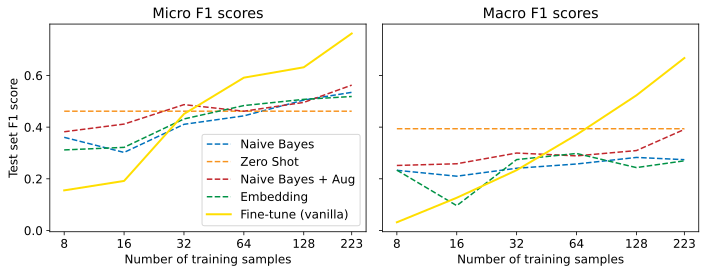

In [56]:
plot_metrics(micro_scores, macro_scores, train_samples, "Fine-tune (vanilla)")

Í∏∞Î≥∏Ï†ÅÏù∏ BERT Î™®Îç∏ÏùÑ Í∞ÑÎã®ÌïòÍ≤å ÎØ∏ÏÑ∏ ÌäúÎãùÌï¥ 64Í∞ú ÏÉòÌîåÏóêÏÑú Í≤ΩÏüÅÎ†• ÏûàÎäî Î™®Îç∏ÏùÑ ÏñªÏùå.

 - Î™®Îç∏ÏùÑ ÌõàÎ†®Ìïú ÏûëÏùÄ ÏÉòÌîåÏùò Î†àÏù¥Î∏îÏù¥ ÏùºÎ∂Ä Î∂àÍ∑†ÌòïÌïòÍ∏∞ ÎïåÎ¨∏Ïóê ÏïΩÍ∞Ñ Î∂àÍ∑úÏπôÌïú ÌñâÎèôÏùÑ Î≥¥Ïù∏Îã§Îäî ÏÇ¨Ïã§ÎèÑ ÏïåÍ≤å Îê®

 Î†àÏù¥Î∏îÎßÅÎêòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞ Ï†ÑÏóê, Ìì®ÏÉ∑ ÎèÑÎ©îÏù∏ Î∂ÑÏïºÏóêÏÑú Ïñ∏Ïñ¥ Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï† Îòê Îã§Î•∏ Ïú†ÎßùÌïú Î∞©Î≤ïÏùÑ Îπ†Î•¥Í≤å ÏÇ¥Ìé¥Î¥Ñ

### 9.4.4 ÌîÑÎ°¨ÌîÑÌä∏Î•º ÏÇ¨Ïö©Ìïú Ïù∏-Ïª®ÌÖçÏä§Ìä∏ ÌïôÏäµÍ≥º Ìì®-ÏÉ∑ ÌïôÏäµ

Ïù¥ Ïû•Ïùò Ïïû Î∂ÄÎ∂ÑÏóêÏÑú BERTÎÇò GPT-2 Í∞ôÏùÄ Ïñ∏Ïñ¥ Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï¥ ÏßÄÎèÑ ÌïôÏäµÏóê Ï†ÅÏö©Ìï®.
- Ïù¥Î•º ÏúÑÌï¥ ÌîÑÎ°¨ÌîÑÌä∏Î•º ÏÇ¨Ïö©ÌïòÍ≥† Î™®Îç∏Ïùò ÌÜ†ÌÅ∞ ÏòàÏ∏°ÏùÑ ÌååÏã±Ìï®
- Ïù¥ Î∞©ÏãùÏùÄ ÏûëÏóÖÏóê ÌäπÌôîÎêú Ìó§ÎìúÎ•º Ï∂îÍ∞ÄÌïòÍ≥† Î™®Îç∏ ÌååÎùºÎØ∏ÌÑ∞Î•º ÏûëÏóÖÏóê ÎßûÍ≤å ÌäúÎãùÌïòÎäî Ï†ÑÌÜµÏ†ÅÏù∏ Î∞©ÏãùÍ≥º Îã§Î¶Ñ
  + ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÑÌòÄ ÌïÑÏöîÌïòÏßÄ ÏïäÏùÄ Ïû•Ï†êÍ≥º Í∞ÄÏßÄÍ≥† ÏûàÎäî Î†àÏù¥Î∏îÎßÅÎêú Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©Ìï† Ïàò ÏóÜÎäî Îã®Ï†êÏù¥ ÏûàÏùå

Í∑∏ Ï†àÏ∂©ÏïàÏúºÎ°ú **Ïù∏-Ïª®ÌÖçÏä§Ìä∏ ÌïôÏäµ(in-context learning)** ÎòêÎäî **Ìì®ÏÉ∑ ÌïôÏäµ(few-shot learning)**ÏùÑ ÌôúÏö©ÌïòÎäî Î∞©Î≤ïÎèÑ ÏûàÏùå




In [57]:
prompt = """\
Translate English to French:
thanks =>
"""

Ïù¥ ÌîÑÎ°¨ÌîÑÌä∏Îäî Î™®Îç∏Ïù¥ Îã®Ïñ¥ 'merci'Î•º ÏòàÏ∏°ÌïòÎèÑÎ°ù Ïú†ÎèÑÌï®. - 6Ïû•ÏóêÏÑú ÏöîÏïΩÏùÑ ÏúÑÌï¥ GPT-2Î•º ÏÇ¨Ïö©Ìï† Îïå ÌÖçÏä§Ìä∏Ïóê 'TL;DR'ÏùÑ Ï∂îÍ∞ÄÌï¥ÏÑú Î™®Îç∏Ïù¥ ÌÖçÏä§Ìä∏Î°ú Î™ÖÏãúÏ†Å ÌõàÎ†®ÏùÑ Î∞õÏßÄ ÏïäÍ≥†ÎèÑ ÏöîÏïΩÏùÑ ÏÉùÏÑ±ÌïòÎèÑÎ°ù Ïú†ÎèÑÌï®

GPT-3 ÎÖºÎ¨∏ÏóêÏÑú Ìù•ÎØ∏Î°úÏö¥ Ï†êÏùÄ ÌîÑÎ°¨ÌîÑÌä∏Í∞Ä ÏûàÎäî ÏÉòÌîåÏóêÏÑú Ìö®Í≥ºÏ†ÅÏúºÎ°ú ÌïôÏäµÌïòÎäî ÎåÄÍ∑úÎ™® Ïñ∏Ïñ¥ Î™®Îç∏Ïùò Îä•Î†•ÏûÑ
- ÏïûÏùò Î≤àÏó≠ ÏÉòÌîåÏóê ÏòÅÏñ¥-ÌîÑÎûëÏä§Ïñ¥ Î≤àÏó≠ ÏÉòÌîå Î™á Í∞úÎ•º Î≥¥Í∞ïÌïòÎ©¥ Î™®Îç∏Ïù¥ ÏûëÏóÖÏóêÏÑú Îçî Îõ∞Ïñ¥ÎÇú ÏÑ±Îä•ÏùÑ ÎÉÑ
- Í≤åÎã§Í∞Ä Ï†ÄÏûêÎì§ÏùÄ Î™®Îç∏Ïù¥ Ïù∏-Ïª®ÌÖçÏä§Ìä∏ ÏÉòÌîåÏùÑ Îçî Ïûò ÏÇ¨Ïö©Ìï¥ ÏÑ±Îä•Ïù¥ ÌÅ¨Í≤å Ìñ•ÏÉÅÎê®ÏùÑ ÏïåÍ≤å Îê®
- GPT-3 Ï†ïÎèÑ ÌÅ¨Í∏∞Ïùò Î™®Îç∏ÏùÑ Ïã§Ï†Ñ Ï†úÌíàÏóê ÏÇ¨Ïö©ÌïòÍ∏∞Í∞Ä Ïñ¥Î†µÏßÄÎßå, Ïù¥Îäî ÏÉàÎ°≠Í≤å Î∂ÄÏÉÅÌïòÎäî Ïó∞Íµ¨Î∂ÑÏïºÏù¥Î©∞, ÏûêÏó∞Ïñ¥Î°ú Î™ÖÎ†πÏùÑ ÏûÖÎ†•ÌïòÍ≥† GPT-3Í∞Ä ÌååÏã±Ìï¥ Î™ÖÎ†πÏùÑ ÏÖ∏Ïóê Ï†ÑÎã¨ÌïòÎäî ÏûêÏó∞Ïñ¥ ÏÖ∏ Í∞ôÏùÄ Î©ãÏßÑ Ïï†ÌîåÎ¶¨ÏºÄÏù¥ÏÖòÏùÑ ÎßåÎì¨

---

Î†àÏù¥Î∏îÎßÅÎêú Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÎäî Îòê Îã§Î•∏ Î∞©Î≤ïÏúºÎ°ú ÌîÑÎ°¨ÌîÑÌä∏ ÏÉòÌîåÍ≥º ÏõêÌïòÎäî ÏòàÏ∏°ÏùÑ ÎßåÎì§Í≥† Ïù¥Îü∞ ÏÉòÌîåÎ°ú Ïñ∏Ïñ¥ Î™®Îç∏ÏùÑ Í≥ÑÏÜç ÌõàÎ†®ÌïòÎäî Î∞©Î≤ïÏù¥ ÏûàÏùå
- Ïù¥ Î∞©ÏãùÏùÑ Îî∞Î•¥Îäî ADAPETÏù¥ÎûÄ Ïù¥Î¶ÑÏùò ÏÉà Î∞©Î≤ïÏùÄ ÏÉùÏÑ±Îêú ÌîÑÎ°¨ÌîÑÌä∏Î°ú Î™®Îç∏ÏùÑ ÌäúÎãùÌï¥ Îã§ÏñëÌïú ÏûëÏóÖÏóêÏÑú GPT-3Î•º Îä•Í∞ÄÌïòÎäî ÏÑ±Îä• Î≥¥Ïó¨Ï§å
- Ïù¥ Î∞©ÏãùÏùÄ ÏÇ¨Ïö©Ïûê Ìó§ÎìúÎ•º ÎØ∏ÏÑ∏ ÌäúÎãùÌïòÎäî Í≤ÉÎ≥¥Îã§ Îçî Îç∞Ïù¥ÌÑ∞ Ìö®Ïú®Ï†ÅÏùº Ïàò ÏûàÏùå




## 9.5 Î†àÏù¥Î∏îÎßÅÎêòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞ ÌôúÏö©ÌïòÍ∏∞

**ÎèÑÎ©îÏù∏ Ï†ÅÏùë(domain adaption)**

- Ïñ∏Ïñ¥ Î™®Îç∏ÏùÑ Î∞ëÎ∞îÎã•Î∂ÄÌÑ∞ Ïû¨ÌõàÎ†®ÌïòÎäî ÎåÄÏã† Ï£ºÏñ¥ÏßÑ ÎèÑÎ©îÏù∏Ïùò Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Í≥ÑÏÜç ÌõàÎ†®ÌïòÎäî Î∞©Î≤ï
- Ïù¥ Îã®Í≥ÑÏóêÏÑúÎäî ÎßàÏä§ÌÇπÎêú Îã®Ïñ¥Î•º ÏòàÏ∏°ÌïòÎäî Í≥†Ï†ÑÏ†ÅÏù∏ Ïñ∏Ïñ¥ Î™®Îç∏Ïùò Î™©ÌëúÎ•º ÏÇ¨Ïö©
  + Î†àÏù¥Î∏îÎßÅÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÌïÑÏöîÌïòÏßÄ ÏïäÏùå
  + Ï†ÅÏùëÎêú Î™®Îç∏ÏùÑ Î∂ÑÎ•òÍ∏∞Î°ú Î°úÎìúÌïòÍ≥† ÎØ∏ÏÑ∏ÌäúÎãùÌï¥ÏÑú Î†àÏù¥Î∏îÎßÅÎêòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©


  Ïù¥Ï†ú ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú Ïñ∏Ïñ¥ Î™®Îç∏ÏùÑ ÎØ∏ÏÑ∏ÌäúÎãùÌï† Îïå Í±∞Ï≥êÏïº Ìï† Îã®Í≥ÑÎ•º ÏïåÏïÑÎ¥Ñ

### 9.5.1 Ïñ∏Ïñ¥ Î™®Îç∏ ÎØ∏ÏÑ∏ ÌäúÎãùÌïòÍ∏∞

ÎßàÏä§ÌÅ¨Îìú Ïñ∏Ïñ¥ Î™®Îç∏ÎßÅÏúºÎ°ú ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú BERT Î™®Îç∏ÏùÑ Î†àÏù¥Î∏îÎßÅÏù¥ ÏóÜÎäî Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÎØ∏ÏÑ∏ ÌäúÎãùÌï®
- Îç∞Ïù¥ÌÑ∞ ÌÜ†ÌÅ∞Ìôî Ï∂îÍ∞Ä Îã®Í≥Ñ
- ÌäπÎ≥ÑÌïú Îç∞Ïù¥ÌÑ∞ ÏΩúÎ†àÏù¥ÌÑ∞

ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎäî ÌÖçÏä§Ìä∏Ïóê ÏûàÎäî ÏùºÎ∞òÏ†ÅÏù∏ ÌÜ†ÌÅ∞ Ïô∏Ïóê Î∂ÑÎ•òÏôÄ Îã§Ïùå Î¨∏Ïû• ÏòàÏ∏°Ïóê ÏÇ¨Ïö©Ìï† [CLS]ÏôÄ [SEP] Í∞ôÏùÄ ÌäπÏä§ ÌÜ†ÌÅ∞ÎèÑ ÏãúÌÄÄÏä§Ïóê Ï∂îÍ∞ÄÌï®
- ÎßàÏä§ÌÅ¨Îìú Ïñ∏Ïñ¥ Î™®Îç∏ÎßÅÏóêÏÑúÎäî Ïù¥Îü∞ ÌÜ†ÌÅ∞ÎèÑ ÏòàÏ∏°ÌïòÎèÑÎ°ù Î™®Îç∏ÏùÑ ÌõàÎ†®ÌïòÏßÄ ÏïäÏùå -> Ïù¥Îü∞ Ïù¥Ïú†ÎèÑ ÏÜêÏã§ÏùÑ Í≥ÑÏÇ∞Ìï† Îïå ÌäπÏàò ÌÜ†ÌÅ∞ÏùÑ ÎßàÏä§ÌÇπÌï®
- Ïù¥ Ïô∏ return_special_tokens_mask = TrueÎ°ú ÏÑ§Ï†ïÌï¥ ÌÜ†ÌÅ∞ÌôîÌï† Îïå ÎßàÏä§ÌÅ¨Î•º ÏñªÏùÑ Ïàò ÏûàÏùå

In [58]:
def tokenize(batch):
    return tokenizer(batch["text"], truncation=True,
                     max_length=128, return_special_tokens_mask=True)

ds_mlm = ds.map(tokenize, batched=True)
ds_mlm = ds_mlm.remove_columns(["labels", "text", "label_ids"])

Map:   0%|          | 0/223 [00:00<?, ? examples/s]

Map:   0%|          | 0/106 [00:00<?, ? examples/s]

Map:   0%|          | 0/111 [00:00<?, ? examples/s]

Map:   0%|          | 0/9303 [00:00<?, ? examples/s]

ÎßàÏä§ÌÅ¨Îìú Ïñ∏Ïñ¥ Î™®Îç∏ÎßÅÏùÑ ÏãúÏûëÌïòÎ†§Î©¥ ÏûÖÎ†• ÏãúÌÄÄÏä§Ïóê ÏûàÎäî ÌÜ†ÌÅ∞ÏùÑ ÎßàÏä§ÌÇπÌïòÍ≥† Ï∂úÎ†•ÏóêÏÑú ÌÉÄÍπÉ ÌÜ†ÌÅ∞ÏùÑ ÎßàÎ†®ÌïòÎäî Î©îÏª§ÎãàÏ¶òÏù¥ ÌïÑÏöîÌï®
- Ïù¥Î•º ÏúÑÌï¥ ÎûúÎç§Ìïú ÌÜ†ÌÅ∞ÏùÑ ÎßàÏä§ÌÇπÌïòÍ≥† ÏãúÌÄÄÏä§Î•º ÏúÑÌï¥ Î†àÏù¥Î∏îÏùÑ ÏÉùÏÑ±ÌïòÎäî Ìï®ÏàòÎ•º ÏûëÏÑ±
- ÌïòÏßÄÎßå Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÌÉÄÍπÉ ÏãúÌÄÄÏä§ÎèÑ Ï†ÄÏû•Ìï¥Ïïº ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌÅ¨Í∏∞Îäî Îëê Î∞∞Í∞Ä ÎêòÎ©¥, ÏóêÌè¨ÌÅ¨ÎßàÎã§ ÎèôÏùºÌïú ÏãúÍ∂åÏä§ ÎßàÏä§ÌÇπÏùÑ ÏÇ¨Ïö©ÌïòÍ≤å Îê®

---

Î∞òÎ©¥ Îç∞Ïù¥ÌÑ∞ ÏΩúÎ†àÏù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÎäî Î∞©ÏãùÏùÄ Îçî Ïö∞ÏïÑÌï®

**(Îç∞Ïù¥ÌÑ∞ ÏΩúÎ†àÏù¥ÌÑ∞)** Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º Î™®Îç∏ Ìò∏Ï∂ú ÏÇ¨Ïù¥Î•º Ïó∞Í≤∞ÌïòÎäî Ìï®Ïàò
- Î∞∞ÏπòÎäî Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÏÉòÌîåÎßÅÎêòÍ≥† Îç∞Ïù¥ÌÑ∞ ÏΩúÎ†àÏù¥ÌÑ∞Îäî Î∞∞ÏπòÏóê ÏûàÎäî ÏõêÏÜåÎ•º Î™®Îç∏Ïóê Ï£ºÏûÖÌïòÍ∏∞ ÏúÑÌï¥ Ï§ÄÎπÑÌï®
- Í∞ÄÏû• Í∞ÑÎã®Ìïú ÏòàÎäî Í∞Å ÏõêÏÜåÏùò ÌÖêÏÑúÎ•º ÌïòÎÇòÏùò ÌÖêÏÑúÎ°ú Ïó∞Í≤∞ÌïòÎäî Í≤ΩÏö∞
- Ïó¨Í∏∞ÏÑúÎäî ÎèôÏ†ÅÏúºÎ°ú ÎßàÏä§ÌÇπÍ≥º Î†àÏù¥Î∏î ÏÉùÏÑ±ÏùÑ ÏàòÌñâÌïòÍ∏∞ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞ ÏΩúÎ†àÏù¥ÌÑ∞Î•º ÏÇ¨Ïö©Ìï®

Ïù¥Îü∞ Î∞©ÏãùÏóêÏÑúÎäî Î†àÏù¥Î∏îÏùÑ Ï†ÄÏû•Ìï† ÌïÑÏöîÍ∞Ä ÏóÜÍ≥† ÏÉòÌîåÎßÅÌï† ÎïåÎßàÎã§ ÏÉà ÎßàÏä§ÌÅ¨Î•º ÏñªÏùå
- Ïù¥Îü∞ ÏûëÏóÖÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ ÏΩúÎ†àÏù¥ÌÑ∞Îäî **DataCollatorForLanguageModeling**ÏùÑ ÏÇ¨Ïö©
  + Î™®Îç∏Ïùò ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÏôÄ ÎßàÏä§ÌÇπÌï† ÌÜ†ÌÅ∞ ÎπÑÏú®ÏùÑ mlm_probability Îß§Í∞úÎ≥ÄÏàòÏóê ÏßÄÏ†ïÌï¥ Ï¥àÍ∏∞ÌôîÌï®
  + BERT ÎÖºÎ¨∏Ïóê Îî∞Îùº Ïù¥ ÏΩúÎ†àÏù¥ÌÑ∞Î°ú ÌÜ†ÌÅ∞Ïùò 15%Î•º ÎßàÏä§ÌÇπÌï®
  

In [59]:
from transformers import DataCollatorForLanguageModeling, set_seed

data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer,
                                                mlm_probability=0.15)

DataFrameÏúºÎ°ú Í≤∞Í≥ºÎ•º Îπ†Î•¥Í≤å ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÏôÄ Îç∞Ïù¥ÌÑ∞ ÏΩúÎ†àÏù¥ÌÑ∞Ïùò Î∞òÌôò Ìè¨Îß∑ÏùÑ ÎÑòÌååÏù¥Î°ú Î∞îÍøà

In [60]:
set_seed(3)
data_collator.return_tensors = "np"
inputs = tokenizer("Transformers are awesome!", return_tensors="np")
original_input_ids = inputs["input_ids"][0]
outputs = data_collator([{"input_ids": inputs["input_ids"][0]}])
masked_input_ids = outputs["input_ids"][0]

pd.DataFrame({
    "Original tokens": tokenizer.convert_ids_to_tokens(original_input_ids),
    "Masked tokens": tokenizer.convert_ids_to_tokens(masked_input_ids),
    "Original input_ids": original_input_ids,
    "Masked input_ids": masked_input_ids,
    "Labels": outputs["labels"][0]}).T

0             1     2        3       4      5
Original tokens     [CLS]  transformers   are  awesome       !  [SEP]
Masked tokens       [CLS]  transformers   are  awesome  [MASK]  [SEP]
Original input_ids    101         19081  2024    12476     999    102
Masked input_ids      101         19081  2024    12476     103    102
Labels               -100          -100  -100     -100     999   -100

ÎäêÎÇåÌëúÏóê Ìï¥ÎãπÌïòÎäî ÌÜ†ÌÅ∞Ïù¥ ÎßàÏä§ÌÇπ ÌÜ†ÌÅ∞ÏúºÎ°ú Î∞îÎÄú
- Îç∞Ïù¥ÌÑ∞ ÏΩúÎ†àÏù¥ÌÑ∞Í∞Ä Î†àÏù¥Î∏î Î∞∞Ïó¥ÏùÑ Î∞òÌôòÌï®
  - Ïù¥ Î∞∞Ïó¥ÏóêÏÑú ÏõêÎ≥∏ ÌÜ†ÌÅ∞ÏùÄ -100Ïù¥Í≥† ÎßàÏä§ÌÇπÎêú ÌÜ†ÌÅ∞Ïùò Í≤ΩÏö∞Îäî ÌÜ†ÌÅ∞ IDÏûÑ
  + Ïù¥Ï†ÑÏóê Î≥¥ÏïòÎìØ -100Ïóê Ìï¥ÎãπÌïòÎäî Ìï≠Î™©ÏùÄ ÏÜêÏã§ÏùÑ Í≥ÑÏÇ∞Ìï† Îïå Î¨¥ÏãúÎê®
  
Îã§Ïãú Îç∞Ïù¥ÌÑ∞ ÏΩúÎ†àÏù¥ÌÑ∞Ïùò Ìè¨Îß∑ÏùÑ ÌååÏù¥ÌÜ†ÏπòÎ°ú Î∞îÍøà

In [61]:
data_collator.return_tensors = "pt"

ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÏôÄ Îç∞Ïù¥ÌÑ∞ ÏΩúÎ†àÏù¥ÌÑ∞Í∞Ä ÏûàÏúºÎãà ÎßàÏä§ÌÅ¨Îìú Ïñ∏Ïñ¥ Î™®Îç∏ÏùÑ ÎØ∏ÏÑ∏ ÌäúÎãùÌï† Ï§ÄÎπÑÍ∞Ä Îê®

- Ïù¥Ï†ÑÏ≤òÎüº TrainingArgumentsÏôÄ Trainer ÏÑ§Ï†ï

In [62]:
from huggingface_hub import notebook_login

notebook_login()

In [64]:
from transformers import AutoModelForMaskedLM

training_args = TrainingArguments(
    output_dir = f"{model_ckpt}-issues-128", per_device_train_batch_size=32,
    logging_strategy="epoch", evaluation_strategy="epoch", save_strategy="no",
    num_train_epochs=16, push_to_hub=True, log_level="error", report_to="none")

trainer = Trainer(
        model=AutoModelForMaskedLM.from_pretrained("bert-base-uncased"),
        tokenizer=tokenizer, args=training_args, data_collator=data_collator,
        train_dataset=ds_mlm["unsup"], eval_dataset=ds_mlm["train"])

trainer.train()

{'loss': 2.1081, 'learning_rate': 4.6875e-05, 'epoch': 1.0}
{'eval_loss': 1.6857380867004395, 'eval_runtime': 0.7784, 'eval_samples_per_second': 286.47, 'eval_steps_per_second': 35.969, 'epoch': 1.0}
{'loss': 1.6343, 'learning_rate': 4.375e-05, 'epoch': 2.0}
{'eval_loss': 1.3655192852020264, 'eval_runtime': 0.7871, 'eval_samples_per_second': 283.316, 'eval_steps_per_second': 35.573, 'epoch': 2.0}
{'loss': 1.4792, 'learning_rate': 4.0625000000000005e-05, 'epoch': 3.0}
{'eval_loss': 1.4229965209960938, 'eval_runtime': 0.811, 'eval_samples_per_second': 274.964, 'eval_steps_per_second': 34.525, 'epoch': 3.0}
{'loss': 1.3974, 'learning_rate': 3.7500000000000003e-05, 'epoch': 4.0}
{'eval_loss': 1.4269212484359741, 'eval_runtime': 0.8029, 'eval_samples_per_second': 277.733, 'eval_steps_per_second': 34.872, 'epoch': 4.0}
{'loss': 1.343, 'learning_rate': 3.4375e-05, 'epoch': 5.0}
{'eval_loss': 1.2746531963348389, 'eval_runtime': 0.7781, 'eval_samples_per_second': 286.589, 'eval_steps_per_second

TrainOutput(global_step=4656, training_loss=1.2835331225313271, metrics={'train_runtime': 1254.2395, 'train_samples_per_second': 118.676, 'train_steps_per_second': 3.712, 'train_loss': 1.2835331225313271, 'epoch': 16.0})

In [65]:
trainer.push_to_hub("Training complete!")

training_args.bin:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

CommitInfo(commit_url='https://huggingface.co/youngbreadho/bert-base-uncased-issues-128/commit/da0c316f59d7e55c9f99ec3633d9cee5d720640f', commit_message='Training complete!', commit_description='', oid='da0c316f59d7e55c9f99ec3633d9cee5d720640f', pr_url=None, pr_revision=None, pr_num=None)

Î™®Îç∏Ïùò ÌõàÎ†® ÏÜêÏã§Í≥º Í≤ÄÏ¶ù ÏÜêÏã§ÏùÑ Î≥¥Í∏∞ ÏúÑÌï¥ TrainerÏùò Î°úÍ∑∏ Í∏∞Î°ùÏùÑ ÌôïÏù∏
- Î™®Îì† Î°úÍ∑∏Îäî ÎîïÏÖîÎÑàÎ¶¨Ïùò Î¶¨Ïä§Ìä∏Î°ú trainer.state.log_historyÏóê Ï†ÄÏû•ÎêòÏñ¥ ÏâΩÍ≤å ÌåêÎã§Ïä§ DataFrameÏúºÎ°ú Î°úÎìúÎê®
- ÌõàÎ†®Í≥º Í≤ÄÏ¶ù ÏÜêÏã§Ïù¥ Îã§Î•∏ Í∞ÑÍ≤©ÏúºÎ°ú Í∏∞Î°ùÎêòÍ∏∞ ÎñÑÎ¨∏Ïóê Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏóê ÎàÑÎùΩÎêú Í∞íÏù¥ ÏûàÏùå => ÏãúÍ∞ÅÌôî Ï†Ñ ÏÇ≠Ï†ú


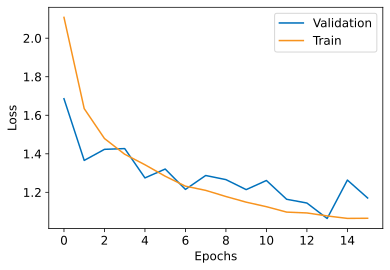

In [66]:
df_log = pd.DataFrame(trainer.state.log_history)

(df_log.dropna(subset=["eval_loss"]).reset_index()["eval_loss"]
 .plot(label="Validation"))
df_log.dropna(subset=["loss"]).reset_index()["loss"].plot(label="Train")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

ÌõàÎ†® ÏÜêÏã§Í≥º Í≤ÄÏ¶ù ÏÜêÏã§Ïù¥ Î™®Îëê ÏÉÅÎãπÌûà Ï§ÑÏñ¥Îì† Í≤ÉÏùÑ ÌôïÏù∏Ìï®

Îî∞ÎùºÏÑú Ïù¥ Î™®Îç∏ÏùÑ Í∏∞Î∞òÏúºÎ°ú Î∂ÑÎ•òÍ∏∞Î•º ÎØ∏ÏÑ∏ ÌäúÎãùÌï¥ ÏÑ±Îä•Ïù¥ Ïò¨ÎùºÍ∞ÄÎäî Í≤ÉÏùÑ ÌôïÏù∏!

### 9.5.2 Î∂ÑÎ•òÍ∏∞ ÎØ∏ÏÑ∏ ÌäúÎãùÌïòÍ∏∞

ÏïûÏÑú ÎßåÎì† Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏Î•º Ï°∞Í∏à Îã§Î•¥Í≤å Î°úÎìúÌïòÍ≥† ÎØ∏ÏÑ∏ ÌäúÎãù Í≥ºÏ†ïÏùÑ Î∞òÎ≥µÌï®

In [67]:
model_ckpt = f'{model_ckpt}-issues-128'
config = AutoConfig.from_pretrained(model_ckpt)
config.num_labels = len(all_labels)
config.problem_type = "multi_label_classification"

for train_slice in train_slices:
    model = AutoModelForSequenceClassification.from_pretrained(model_ckpt,
                                                               config=config)
    trainer = Trainer(
        model=model,
        tokenizer=tokenizer,
        args=training_args_fine_tune,
        compute_metrics=compute_metrics,
        train_dataset=ds_enc["train"].select(train_slice),
        eval_dataset=ds_enc["valid"],
    )

    trainer.train()
    pred = trainer.predict(ds_enc['test'])
    metrics = compute_metrics(pred)
    # DAÎäî ÎèÑÎ©îÏù∏ Ï†ÅÏùëÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§
    macro_scores['Fine-tune (DA)'].append(metrics['macro f1'])
    micro_scores['Fine-tune (DA)'].append(metrics['micro f1'])

{'loss': 0.6372, 'learning_rate': 3e-05, 'epoch': 1.0}
{'eval_loss': 0.5692640542984009, 'eval_micro f1': 0.0, 'eval_macro f1': 0.0, 'eval_runtime': 0.2465, 'eval_samples_per_second': 429.938, 'eval_steps_per_second': 16.224, 'epoch': 1.0}
{'loss': 0.5231, 'learning_rate': 3e-05, 'epoch': 2.0}
{'eval_loss': 0.48763981461524963, 'eval_micro f1': 0.0, 'eval_macro f1': 0.0, 'eval_runtime': 0.2406, 'eval_samples_per_second': 440.532, 'eval_steps_per_second': 16.624, 'epoch': 2.0}
{'loss': 0.4379, 'learning_rate': 3e-05, 'epoch': 3.0}
{'eval_loss': 0.44184383749961853, 'eval_micro f1': 0.0, 'eval_macro f1': 0.0, 'eval_runtime': 0.2599, 'eval_samples_per_second': 407.877, 'eval_steps_per_second': 15.392, 'epoch': 3.0}
{'loss': 0.3935, 'learning_rate': 3e-05, 'epoch': 4.0}
{'eval_loss': 0.4090349078178406, 'eval_micro f1': 0.0, 'eval_macro f1': 0.0, 'eval_runtime': 0.2493, 'eval_samples_per_second': 425.155, 'eval_steps_per_second': 16.044, 'epoch': 4.0}
{'loss': 0.3567, 'learning_rate': 3e-0

Í∏∞Î≥∏ BERTÎ•º Í∏∞Î∞òÏúºÎ°ú ÎØ∏ÏÑ∏ ÌäúÎãùÌïú Í≤∞Í≥ºÎ•º ÎπÑÍµêÌïòÎ©¥ ÌäπÌûà Îç∞Ïù¥ÌÑ∞Í∞Ä Î∂ÄÏ°±Ìïú ÎèÑÎ©îÏù∏ÏóêÏÑú Ïú†Î¶¨Ìï®

- Î†àÏù¥Î∏îÎßÅÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä Îçî ÎßéÏùÄ ÏÉÅÌô©ÏóêÏÑúÎäî Î™á ÌçºÏÑºÌä∏ Ìè¨Ïù∏Ìä∏Í∞Ä Ìñ•ÏÉÅÎê®

In [ ]:
plot_metrics(micro_scores, macro_scores, train_samples, "Fine-tune (DA)")

Ïù¥Îäî ÎèÑÎ©îÏù∏ Ï†ÅÏùëÏù¥ Î†àÏù¥Î∏îÎßÅÎêòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞ÏôÄ ÏïΩÍ∞ÑÏùò ÎÖ∏Î†•ÏùÑ ÌÜµÌï¥ Î™®Îç∏ ÏÑ±Îä•ÏùÑ Ï°∞Í∏à Ìñ•ÏÉÅÏãúÌÇ¨ Ïàò ÏûàÎã§Îäî ÏÇ¨Ïã§ÏùÑ Ïûò Î≥¥Ïó¨Ï§å

### 9.5.3 Í≥†Í∏â Î∞©Î≤ï

Î†àÏù¥Î∏îÎßÅ ÎêòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©ÌïòÎäî Î™á Í∞ÄÏßÄ Ìä∏Î¶≠Ïùò Ï∂îÍ∞ÄÏ†Å ÏÜåÍ∞ú

#### ÎπÑÏßÄÎèÑ Îç∞Ïù¥ÌÑ∞ Ï¶ùÏãù

**ÎπÑÏßÄÎèÑ Îç∞Ïù¥ÌÑ∞ Ï¶ùÏãù(unsupervised data augmentation, UDA)**

Î†àÏù¥Î∏îÎßÅÎêòÏßÄ ÏïäÏùÄ ÏÉòÌîåÍ≥º ÏÇ¥Ïßù ÏôúÍ≥°Îêú ÏÉòÌîåÏóê ÎåÄÌï¥ Î™®Îç∏Ïùò ÏòàÏ∏°Ïù¥ ÏùºÏ†ïÌï¥Ïïº ÌïúÎã§Îäî Í≤É
- ÏôúÍ≥°ÏùÄ ÌÜ†ÌÅ∞ ÍµêÏ≤¥ÎÇò Ïó≠ Î≤àÏó≠ Í∞ôÏùÄ ÌëúÏ§ÄÏ†ÅÏù∏ Îç∞Ïù¥ÌÑ∞ Ï¶ùÏãù Ï†ÑÎûµÏúºÎ°ú ÎßåÎì§Í≤å Îê®
- Í∑∏ Îã§Ïùå ÏõêÎ≥∏ ÏòàÏ∏°Í≥º ÏôúÍ≥°Îêú ÏÉòÌîåÏùò ÏòàÏ∏° ÏÇ¨Ïù¥Ïóê KL Î∞úÏÇ∞ÏùÑ ÏµúÏÜåÌôîÌïòÎèÑÎ°ù ÏùºÍ¥ÄÏÑ±Ïù¥ Í∞ïÏ†úÎ°ú Î∂ÄÏó¨Îê®
- Ïù¥ Í≥ºÏ†ïÏù¥ ÏïÑÎûò Í∑∏Î¶º 9-5Ïóê ÎÇòÌÉÄÎÇò ÏûàÏùå
- Î†àÏù¥Î∏îÎßÅÎêòÏßÄ ÏïäÏùÄ ÏÉòÌîåÏóê ÎåÄÌïú Ìï≠ÏúºÎ°ú ÌÅ¨Î°úÏä§ ÏóîÌä∏Î°úÌîº ÏÜêÏã§ÏùÑ Î≥¥Í∞ïÌï¥ ÏùºÍ¥ÄÏÑ±Ïóê ÎåÄÌïú ÏöîÍµ¨ÏÇ¨Ìï≠ÏùÑ ÌÜµÌï©Ìï®
  - Ï¶â, ÌëúÏ§ÄÏ†ÅÏù∏ ÏßÄÎèÑÌïôÏäµ Î∞©ÏãùÏúºÎ°ú Î†àÏù¥Î∏îÎßÅÎêú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Î™®Îç∏ÏùÑ ÌõàÎ†®ÌïòÏßÄÎßå Î†àÏù¥Î∏îÎßÅÎêòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏùºÍ¥ÄÎêú ÏòàÏ∏°ÏùÑ ÎßåÎì§ÎèÑÎ°ù Î™®Îç∏ÏùÑ Ï†úÌïúÌï®


<img alt="uda" width="600" caption="Training a model M with UDA (courtesy of Qizhe Xie)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter09_uda.png?raw=1" id="uda"/>   

**[Í∑∏Î¶º 9-5]** UDAÎ°ú Î™®Îç∏ MÏùÑ ÌõàÎ†®ÌïòÍ∏∞

Ïù¥ Î∞©ÏãùÏùÄ Îß§Ïö∞ Ïù∏ÏÉÅÏ†ÅÏù∏ ÏÑ±Îä•ÏùÑ ÏÑ†Î≥¥ÏûÑ

- ÏïΩÍ∞ÑÏùò Î†àÏù¥Î∏îÎßÅÎêú ÏÉòÌîåÏùÑ ÏÇ¨Ïö©Ìï¥ UDAÎ°ú ÌõàÎ†®Ìïú BERT Î™®Îç∏Ïù¥ ÏàòÏ≤ú Í∞úÏùò ÏÉòÌîåÎ°ú ÌõàÎ†®Ìïú Î™®Îç∏Í≥º ÎπÑÏä∑Ìïú ÏÑ±Îä•ÏùÑ ÎÉÑ
- ÌïòÏßÄÎßå Îç∞Ïù¥ÌÑ∞ Ï¶ùÏãù ÌååÏù¥ÌîÑÎùºÏù∏Ïù¥ ÌïÑÏöîÌïòÎã§Îäî Îã®Ï†êÏù¥ ÏûàÏùå
- Îòê Î†àÏù¥Î∏îÎßÅÎêòÏßÄ ÏïäÏùÄ ÏÉòÌîåÍ≥º Ï¶ùÏãù ÏÉòÌîåÏóê ÎåÄÌï¥ ÏòàÏ∏°ÏùÑ ÎßåÎì§Í∏∞ ÏúÑÌï¥ Ïó¨Îü¨ Î≤à Ï†ïÎ∞©Ìñ• Ìå®Ïä§Î•º Ïã§ÌñâÌï¥Ïïº ÌïòÎØÄÎ°ú ÌõàÎ†®Ïù¥ Ìõ®Ïî¨ Ïò§Îûò Í±∏Î¶º


#### Î∂àÌôïÏã§ÏÑ± Ïù∏ÏßÄ ÏûêÍ∏∞ ÌõàÎ†®

**Î∂àÌôïÏã§ÏÑ± Ïù∏ÏßÄ ÏûêÍ∏∞ ÌõàÎ†®(uncertainty-aware self-training, UST)**ÎèÑ Î†àÏù¥Î∏îÎßÅÎêòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞Î•º ÌôúÏö©ÌïòÎäî Ïú†ÎßùÌïú Î∞©Î≤ïÏûÑ
- Ïù¥ Î∞©Î≤ïÏùÄ Î†àÏù¥Î∏îÎßÅÎêú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ìã∞Ï≤ò Î™®Îç∏ÏùÑ ÌõàÎ†®ÌïòÍ≥† Ïù¥ Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï¥ Î†àÏù¥Î∏îÎßÅÎêòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏùòÏÇ¨ Î†àÏù¥Î∏î(pseudo-label)ÏùÑ ÎßåÎì†Îã§Îäî Í∞úÎÖêÏóê Í∏∞Ï¥àÌï®
- Ïä§ÌäúÎçòÌä∏ Î™®Îç∏ÏùÄ ÏùòÏÇ¨ Î†àÏù¥Î∏î Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌõàÎ†®ÎêòÍ≥†, ÌõàÎ†® ÌõÑÏóêÎäî Îã§Ïùå Î∞òÎ≥µÏóêÏÑú Ìã∞Ï≤òÍ∞Ä Îê®

Ïù¥ Î∞©Î≤ïÏóêÏÑú ÏùòÏÇ¨ Î†àÏù¥Î∏îÏùÑ ÏÉùÏÑ±ÌïòÎäî Î∞©Î≤ïÏù¥ Ìù•ÎØ∏Î°úÏõÄ
- Î™®Îç∏ ÏòàÏ∏°Ïùò Î∂àÌôïÏã§ÏÑ±ÏùÑ Ï∏°Ï†ïÌïòÍ∏∞ ÏúÑÌï¥ ÎèôÏùºÌïú ÏûÖÎ†•ÏùÑ ÎìúÎ°≠ÏïÑÏõÉÏù¥ Ï†ÅÏö©Îêú Î™®Îç∏Ïóê Ïó¨Îü¨ Î≤à Ï£ºÏûÖÌï®
- Ïù¥Îü∞ ÏòàÏ∏°Ïùò Î∂ÑÏÇ∞Ïù¥ ÌäπÏ†ï ÏÉòÌîåÏóê ÎåÄÌïú Î™®Îç∏Ïùò Î∂àÌôïÏã§ÏÑ±ÏùÑ ÎåÄÎ≥ÄÌï®
- Ïù¥Îü∞ Î∂àÌôïÏã§ÏÑ± Ï∏°Ï†ïÍ∞íÏúºÎ°ú **BALD(Bayesian Active Learning by Disagreement)**ÎùºÎäî Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©Ìï¥ ÏùòÏÇ¨ Î†àÏù¥Î∏îÏùÑ ÏÉòÌîåÎßÅÌï®

---

Ï†ÑÏ≤¥ ÌõàÎ†® ÌååÏù¥ÌîÑ ÎùºÏù∏ÏùÄ ÏïÑÎûò Í∑∏Î¶ºÍ≥º Í∞ôÏùå

<img alt="ust" width="600" caption="The UST method consists of a teacher that generates pseudo-labels and a student that is subsequently trained on those labels; after the student is trained it becomes the teacher and the step is repeated (courtesy of Subhabrata Mukherjee)" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter09_ust.png?raw=1" id="ust"/>

**[Í∑∏Î¶º 9-6]** UST Î∞©Î≤ïÏùÄ ÏùòÏÇ¨ Î†àÏù¥Î∏îÏùÑ ÏÉùÏÑ±ÌïòÎäî Ìã∞Ï≤òÏôÄ Ïù¥ Î†àÏù¥Î∏îÏóêÏÑú ÌõàÎ†®ÎêòÎäî Ïä§ÌäúÎçòÌä∏Î°ú Íµ¨ÏÑ±Îê®

- Ïä§ÌäúÎçòÌä∏Í∞Ä ÌõàÎ†®Îêú ÌõÑ Ìã∞Ï≤òÍ∞Ä ÎêòÎäî Í≥ºÏ†ïÏù¥ Î∞òÎ≥µÎê®

- Ìã∞Ï≤òÎäî Ïù¥Îü∞ Î∞òÎ≥µ Íµ¨Ï°∞Î•º ÌÜµÌï¥ ÏßÄÏÜçÏ†ÅÏúºÎ°ú ÏùòÏÇ¨ Î†àÏù¥Î∏îÏùÑ ÎßåÎìúÎäî Îç∞ Îä•ÏàôÌï¥ÏßÄÎØÄÎ°ú Î™®Îç∏ ÏÑ±Îä•Ïù¥ Ìñ•ÏÉÅÎê®. Í≤∞Íµ≠ Ïù¥ Î∞©ÏãùÏùÄ ÏàòÏ≤ú Í∞úÏù∏ Ï†ÑÏ≤¥ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌõàÎ†®Îêú Î™®Îç∏Ïùò Î™á ÌçºÏÑºÌä∏ ÏïàÏóê Îì§Î©∞ Ïã¨ÏßÄÏñ¥ Ïó¨Îü¨ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú **UDA**Î•º Îä•Í∞ÄÌï®

## Í≤∞Î°†

Ïù¥ Ïû•ÏóêÏÑú Î†àÏù¥Î∏îÏù¥ Ï†ÑÌòÄ ÏóÜÍ±∞ÎÇò Ï°∞Í∏àÎßå ÏûàÎäî Í≤ΩÏö∞ÎùºÎèÑ Î™®Îç∏ÏùÑ ÎßåÎìúÎäî Î∞©Î≤ïÏù¥ ÏûàÎã§Îäî Í≤ÉÏùÑ ÌôïÏù∏Ìï®
- BERT Ïñ∏Ïñ¥ Î™®Îç∏Ïù¥ÎÇò ÌååÏù¥Ïç¨ ÏΩîÎìúÏóêÏÑú ÌõàÎ†®Îêú GPT-2Ï≤òÎüº Îã§Î•∏ ÏûëÏóÖÏóêÏÑú ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú Î™®Îç∏Ïúº ÌôúÏö©Ìï¥ ÏÉàÎ°úÏö¥ ÍπÉÌóàÎ∏å Ïù¥Ïäà Î∂ÑÎ•ò ÏûëÏóÖÏóêÏÑú ÏòàÏ∏°ÏùÑ ÎßåÎìúÎäî Î∞©Î≤ï
- ÏùºÎ∞òÏ†ÅÏù∏ Î∂ÑÎ•ò Ìó§ÎìúÎ•º Í∞ÄÏßÑ Î™®Îç∏ÏùÑ ÌõàÎ†®Ìï† Îïå ÎèÑÎ©îÏù∏ Ï†ÅÏùëÏùÑ ÏÇ¨Ïö©Ìï¥ Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú ÏÑ±Îä•ÏùÑ Ìñ•ÏÉÅÏãúÌÇ¨ Ïàò ÏûàÏùå


Í∞ÄÏû• Ïûò ÎßûÎäî Î∞©Î≤ïÏùÑ Ï∞æÏúºÎ†§Î©¥ ÌèâÍ∞Ä ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ Ï§ÄÎπÑÌïòÍ≥† Îπ†Î•¥Í≤å Î∞òÎ≥µÌï¥ Î≥¥Îäî Í≤ÉÏù¥ Ï¢ãÏùå
- ÌóàÍπÖÌéòÏù¥Ïä§ Ìä∏ÎûúÏä§Ìè¨Î®∏Ïä§Ïùò Ïú†Ïó∞Ìïú APIÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ Ïó¨Îü¨ Î™®Îç∏ÏùÑ Îπ†Î•¥Í≤å Î°úÎìúÌïòÍ≥† ÏΩîÎìú ÏàòÏ†ï ÏóÜÏù¥ Î™®Îç∏ÏùÑ ÎπÑÍµêÌï† Ïàò ÏûàÏùå
- ÌóàÍπÖÌéòÏù¥Ïä§ ÌóàÎ∏åÏóêÎäî Îßå Í∞úÍ∞Ä ÎÑòÎäî Î™®Îç∏Ïù¥ ÏûàÏùå. Ïù¥Ï†ÑÏóê ÎàÑÍµ∞Í∞ÄÍ∞Ä ÎπÑÏä∑Ìïú Î¨∏Ï†úÎ•º Îã§Î§òÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ Îã§Î∂ÑÌï®.
---


